<a href="https://colab.research.google.com/github/solaripynb/SolarRadianceForecaster/blob/main/SolarRadianceForecaster_Spain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base Solar Radiation Forecasting Model:

**Note to Stakeholders and Interested Parties:**

This Notebook serves as a simplified, illustrative example of the foundational solar radiation forecasting model I've developed. Several key portions of the code, including advanced feature engineering steps, model-building strategies, and evaluation metrics, have been redacted or abbreviated.

If you're interested in exploring the full capabilities of this or other models, including more in-depth technical details and how it can be adapted to meet your specific needs, I invite you to contact me directly.

You can reach out via [LinkedIn](https://www.linkedin.com/in/sergiodavidescobar) for a comprehensive walkthrough and potential collaboration.

**Thank you for your interest, and I look forward to the possibility of working together to advance solar energy forecasting.**



# Data Preparation

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Load the dataset
data_path = 'dataset source: PVGIS-SARAH2'
df = pd.read_csv(data_path, parse_dates=['time'], index_col='time')

In [ ]:
# Filter the dataset for the time range from 2012 to 2020
df_filtered = df['2012-01-01':'2020-12-31']

# Display first few rows of the filtered dataset
df_filtered.head()

Gb(i)  Gd(i)  Gr(i)  H_sun   T2m  WS10m  Int
time                                                             
2012-01-01 00:10:00    0.0    0.0    0.0    0.0  7.13   1.10  0.0
2012-01-01 01:10:00    0.0    0.0    0.0    0.0  6.95   1.10  0.0
2012-01-01 02:10:00    0.0    0.0    0.0    0.0  7.29   1.03  0.0
2012-01-01 03:10:00    0.0    0.0    0.0    0.0  7.51   0.90  0.0
2012-01-01 04:10:00    0.0    0.0    0.0    0.0  7.20   0.97  0.0

# Feature Engineering

## Lagged Features:

In [ ]:
# Columns to be lagged
lag_columns = ['Gb(i)', 'Gd(i)', 'Gr(i)', 'H_sun', 'T2m', 'WS10m']
#.... continue

## Temporal Features:

In [ ]:
# Generate temporal features
df_filtered['hour_of_day'] = #df_filtered.... continue
df_filtered['day_of_week'] = #df_filtered.... continue
df_filtered['month'] = #df_filtered.... continue
df_filtered['quarter'] = #df_filtered.... continue

## Moving Averages

In [ ]:
# Columns for which moving averages are to be calculated
ma_columns = ['Gb(i)', 'Gd(i)', 'Gr(i)']

#.... continue

## Historical Values

In [ ]:
# Columns for which historical values are to be calculated
historical_columns = ['Gb(i)', 'Gd(i)', 'Gr(i)', 'H_sun', 'T2m', 'WS10m']

#..... continue

##  Handling NaN and missing values

In [ ]:
# Check for NaN values in the dataset
#... continue

In [ ]:
total_nan

945

In [ ]:
# Fill the remaining NaN values with zero
#... continue

# Verify if all NaN values have been handled
#... continue
remaining_nan_

<ipython-input-18-a4496d5b3d85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(0, inplace=True)


0

In [ ]:
# Check for negative radiation values in 'Gb(i)', 'Gd(i)', 'Gr(i)'
#... continue

negative_radiation_values, non_zero_radiation_when_sun_zero

(Gb(i)    0
 Gd(i)    0
 Gr(i)    0
 dtype: int64,
 Gb(i)    0
 Gd(i)    0
 Gr(i)    0
 dtype: int64)

# Exploratory Data Analysis (EDA)

## Time-Series Plotting

<ipython-input-24-ebd6b4a9bea2>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2019 = df_filtered['2019']


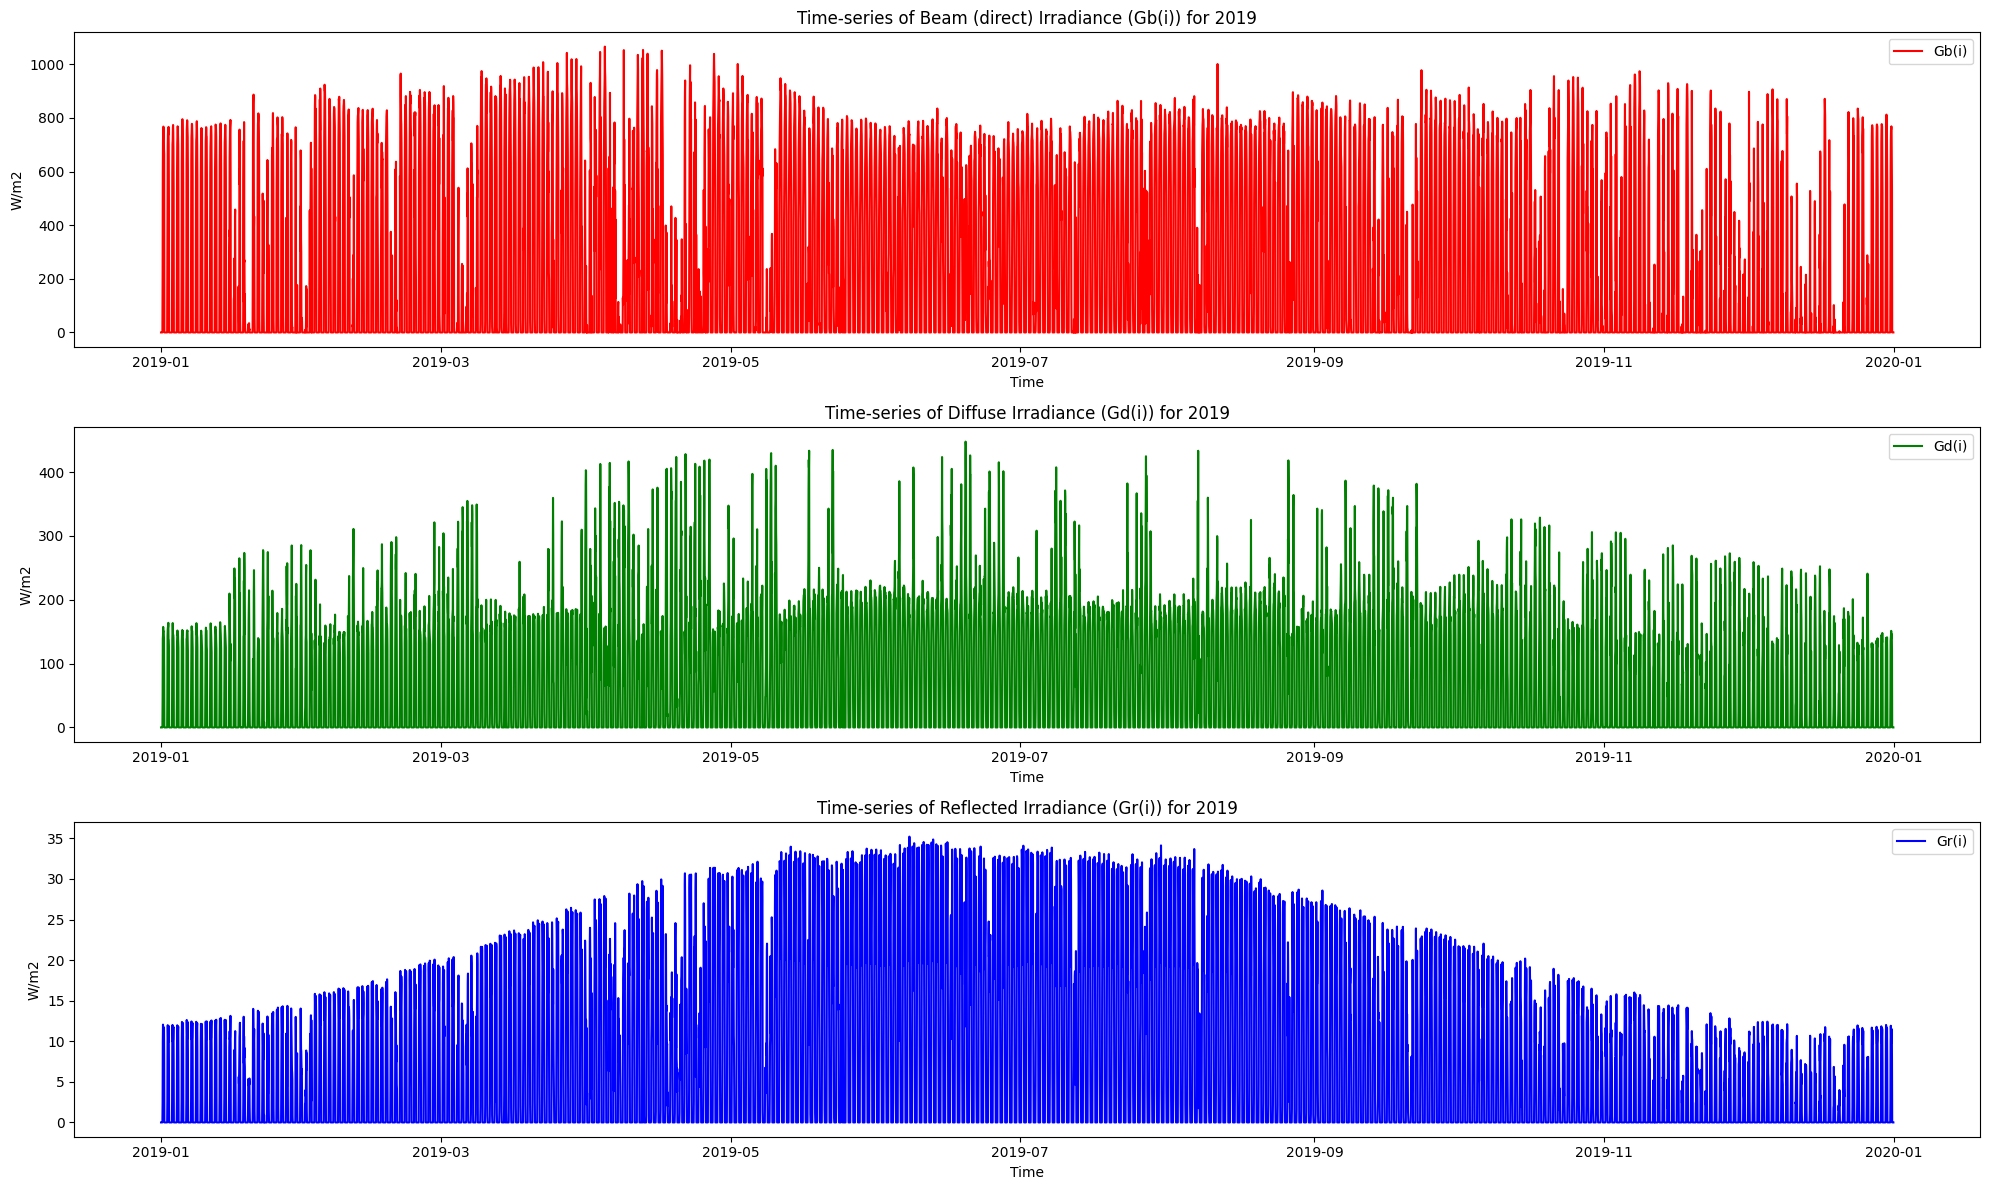

In [ ]:
import matplotlib.pyplot as plt

# Filter data for the year 2019 for visualization
df_2019 = df_filtered['2019']

# continue

plt.tight_layout()
plt.show()

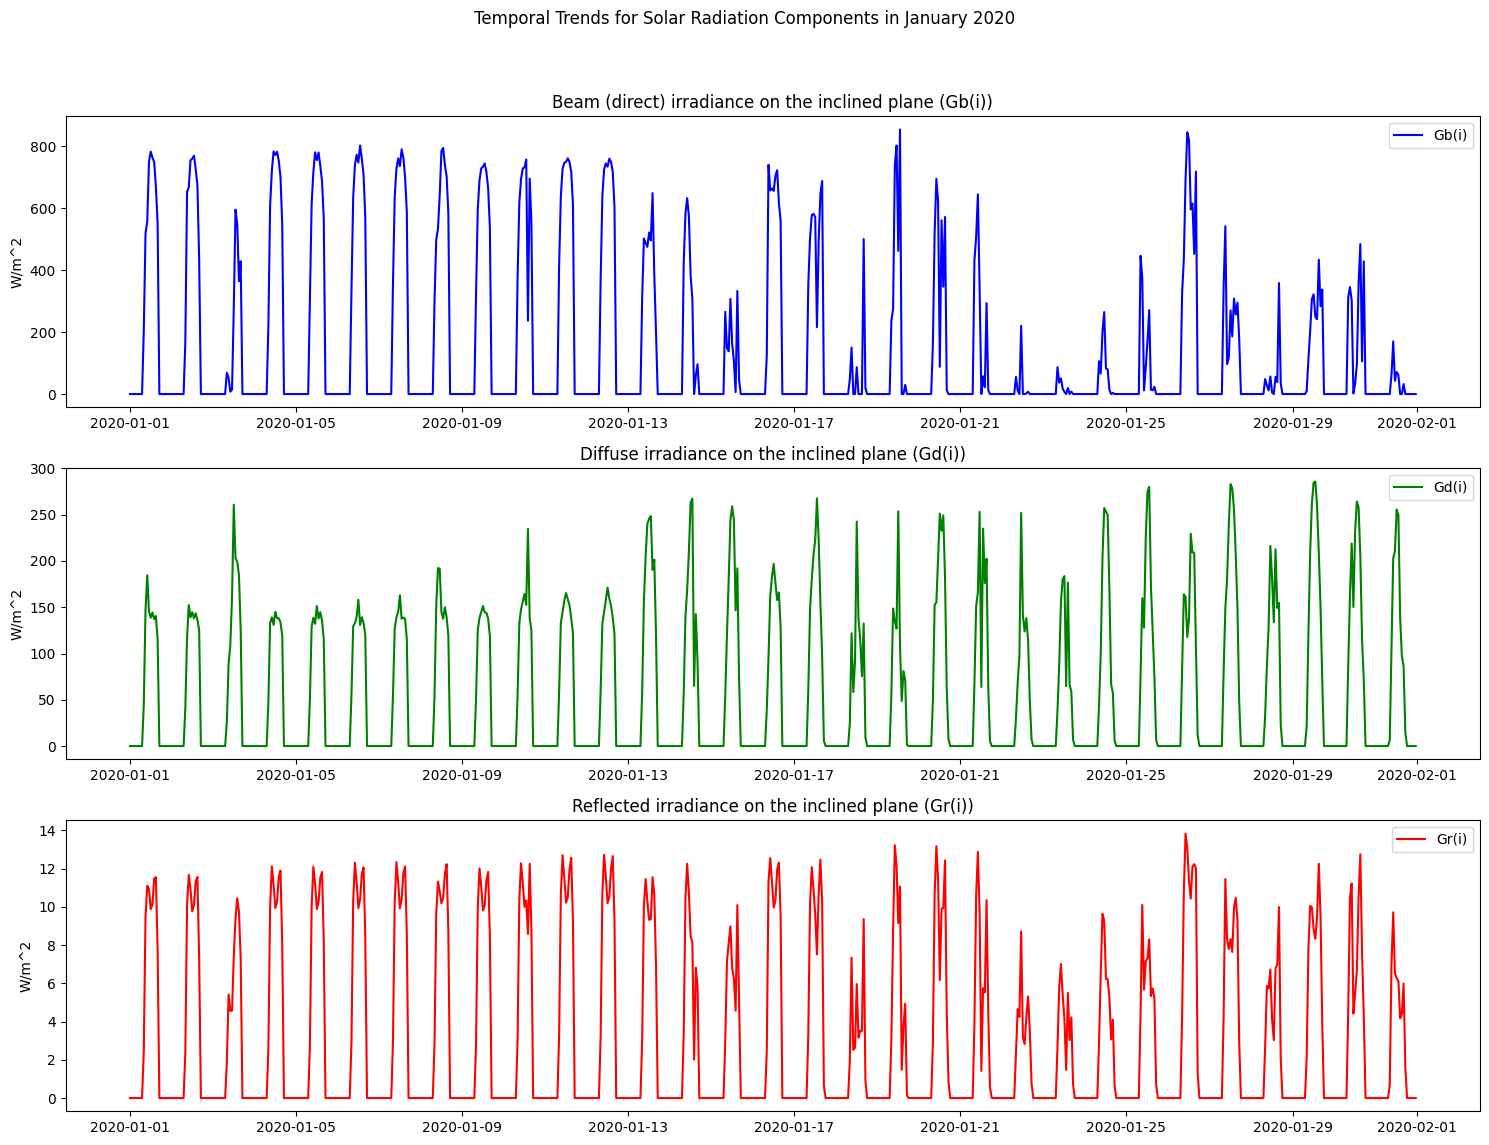

In [ ]:
import matplotlib.pyplot as plt

# Select a subset of data for better visibility in plots (e.g., one month of data)
subset_data = df_filtered['2020-01-01':'2020-01-31']

#... continue

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Observations:

  - Gb(i) (Beam Irradiance): You can observe clear cyclical patterns, indicative of daily cycles. The irradiance peaks during the day and drops to zero during the night.
  - Gd(i) (Diffuse Irradiance): Similar to Gb(i), Gd(i) also shows daily cycles but with smaller magnitudes.
  - Gr(i) (Reflected Irradiance): Gr(i) also exhibits daily cyclical patterns, similar to Gb(i) and Gd(i).

These visualizations confirm the presence of daily cycles and perhaps even seasonal patterns, although the latter would require a more in-depth analysis to confirm.

### Hourly/Daily/Monthly Profiles

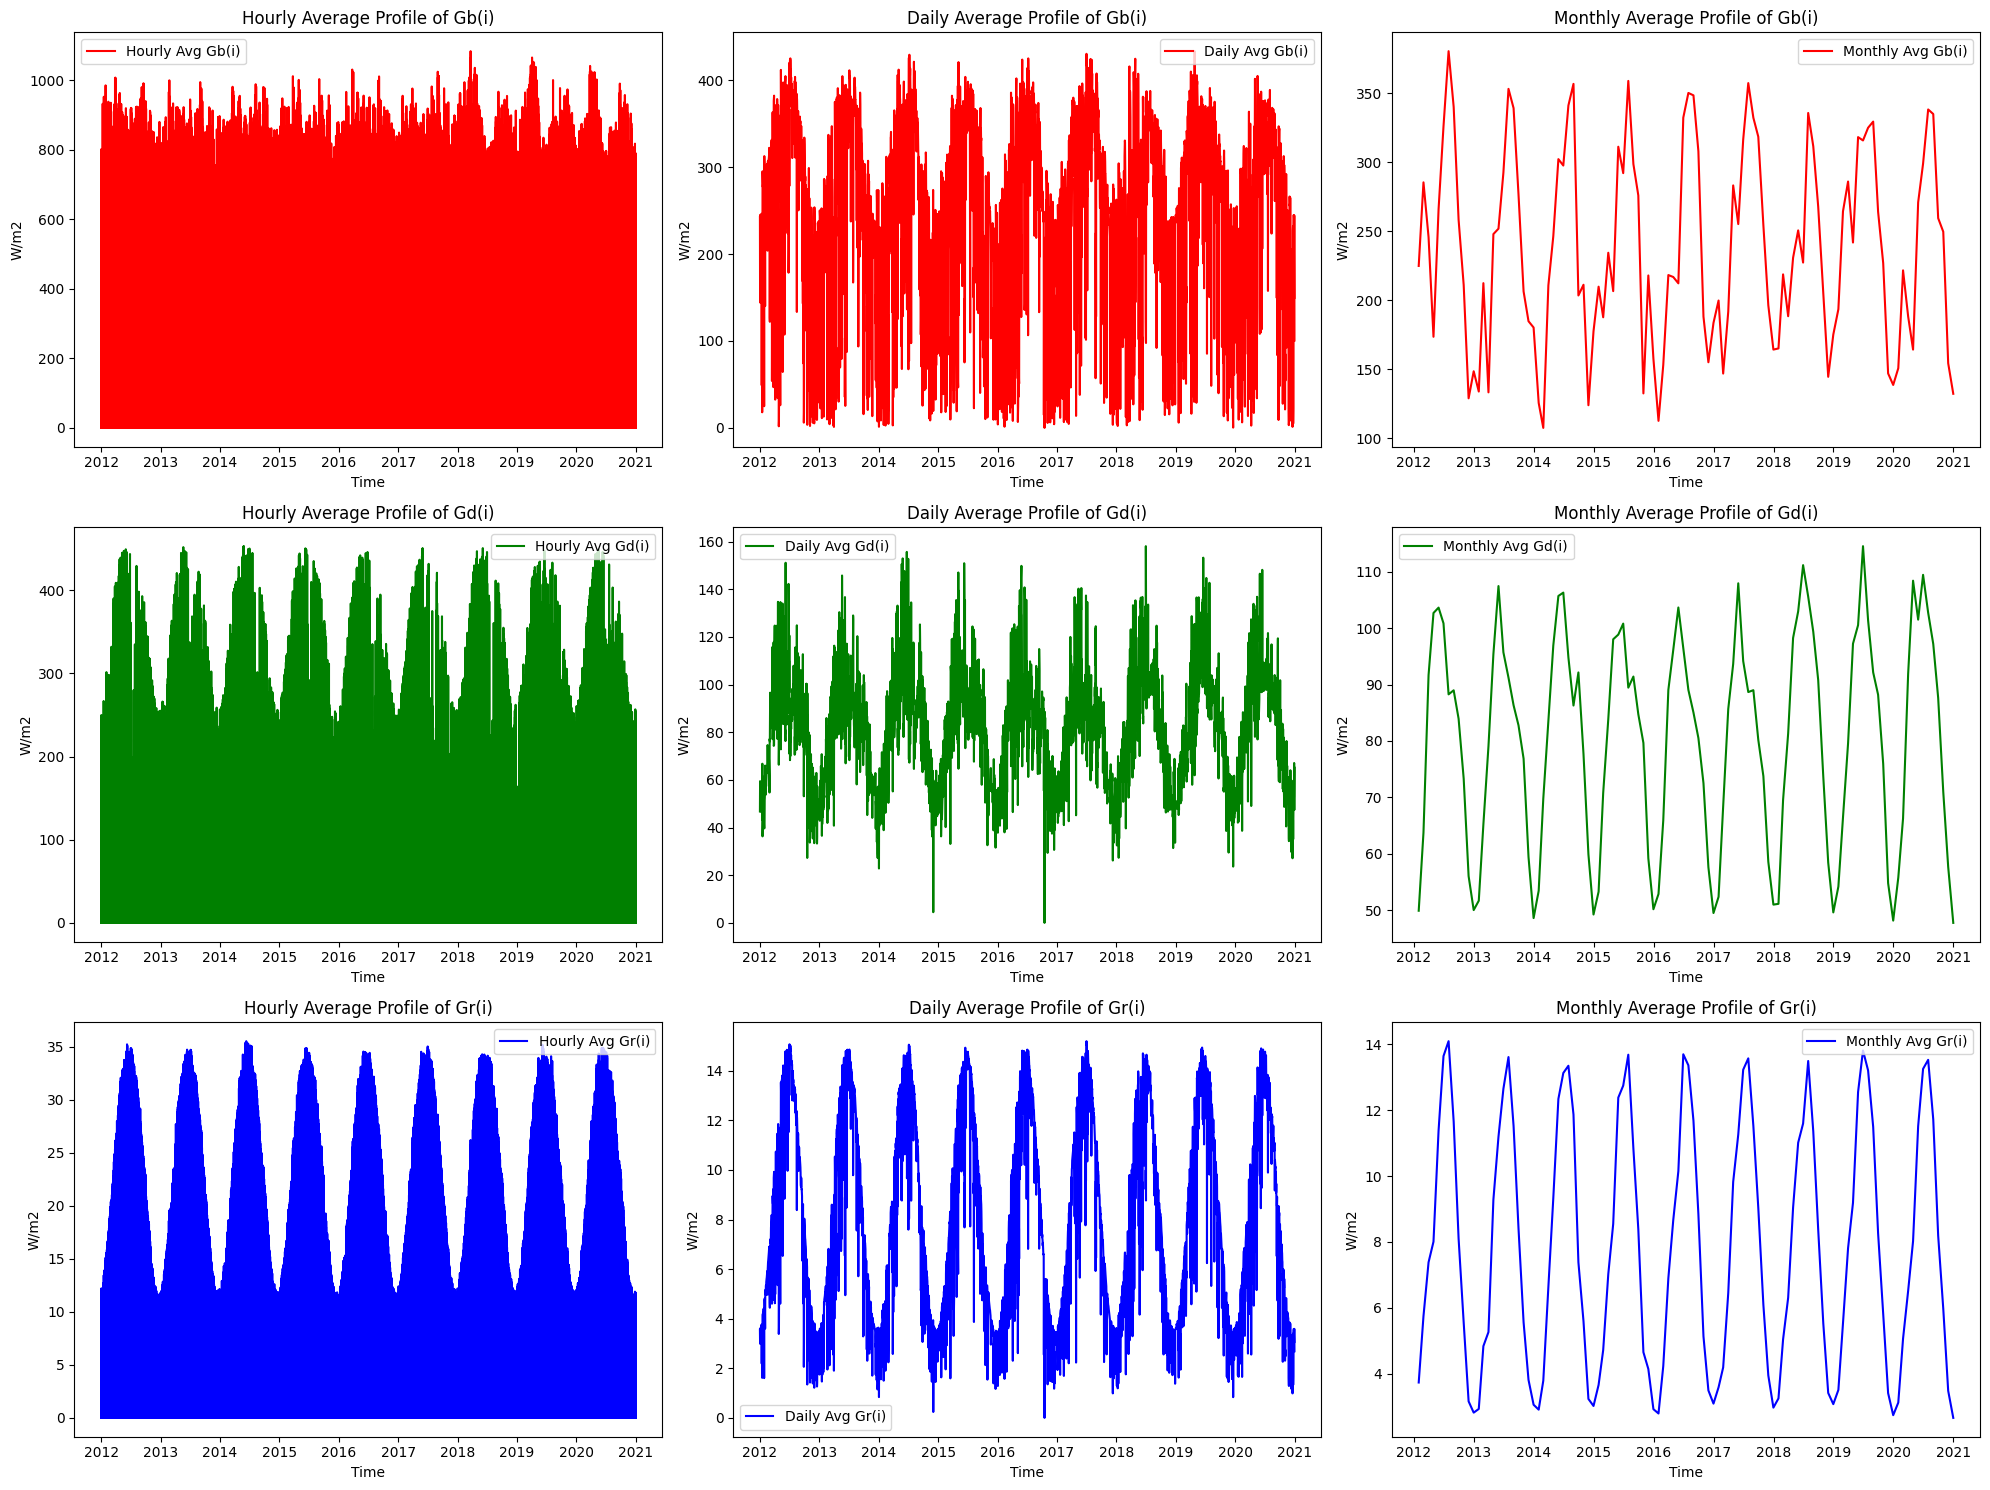

In [ ]:
# Aggregate data to different time resolutions for profiling
hourly_mean = df_filtered.resample('H').mean()
daily_mean = df_filtered.resample('D').mean()
monthly_mean = df_filtered.resample('M').mean()

#... continue

plt.tight_layout()
plt.show()

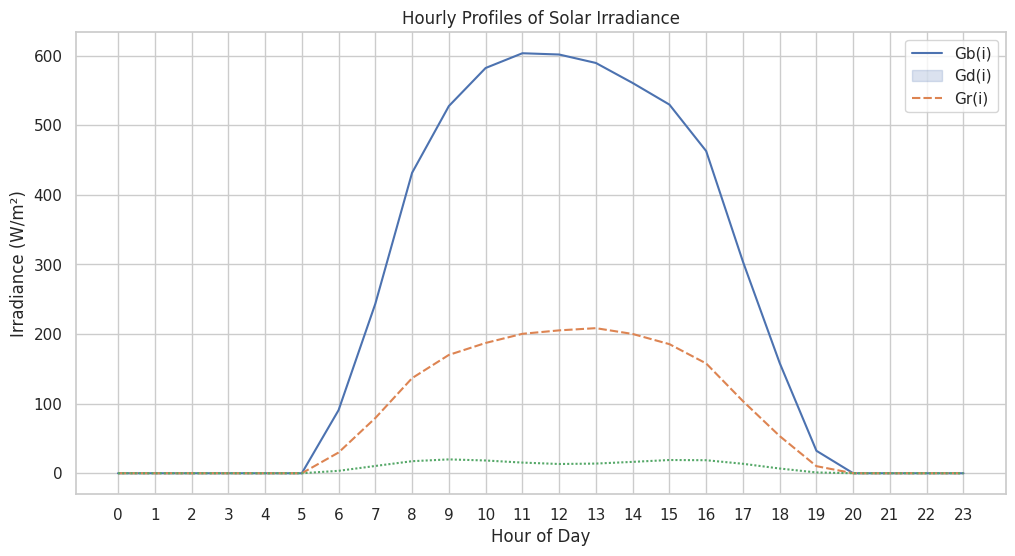

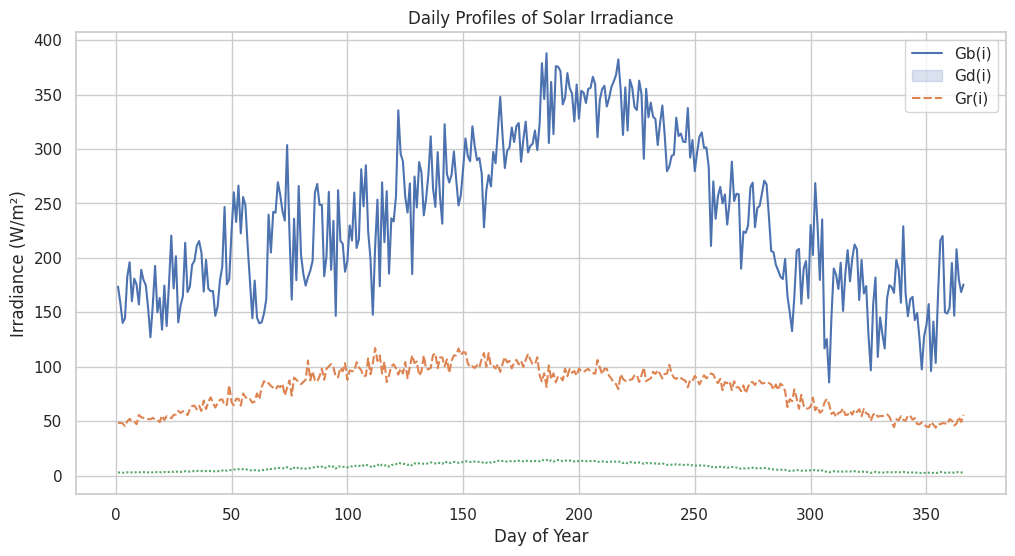

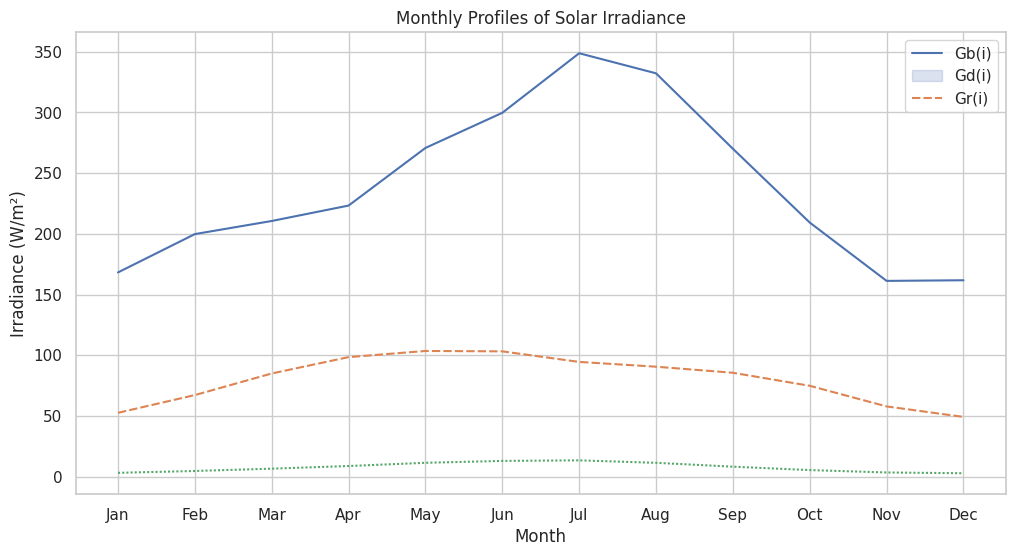

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Setting Seaborn style
sns.set(style="whitegrid")

# Hourly Profile Plot
#... continue

# Plot all profiles
plot_hourly_profile(df_filtered, 'Hourly Profiles of Solar Irradiance')
plot_daily_profile(df_filtered, 'Daily Profiles of Solar Irradiance')
plot_monthly_profile(df_filtered, 'Monthly Profiles of Solar Irradiance')

plt.show()

### Observations:

Gb(i) (Beam Irradiance):
  - The hourly and daily profiles exhibit clear cyclical patterns.
  - The monthly profile suggests possible seasonal variations, with peaks occurring around mid-year.

Gd(i) (Diffuse Irradiance):
  - Similar to Gb(i), the hourly and daily profiles also show cyclical patterns.
  - The monthly profile seems to be less variable compared to Gb(i), but still indicates potential seasonality.

Gr(i) (Reflected Irradiance):
  - Both the hourly and daily profiles show daily cycles.
  - The monthly profile is relatively flat, suggesting less seasonal influence on Gr(i).

The profiles affirm the presence of daily cycles in all three irradiance types, and they suggest potential seasonal patterns, particularly for Gb(i) and Gd(i).

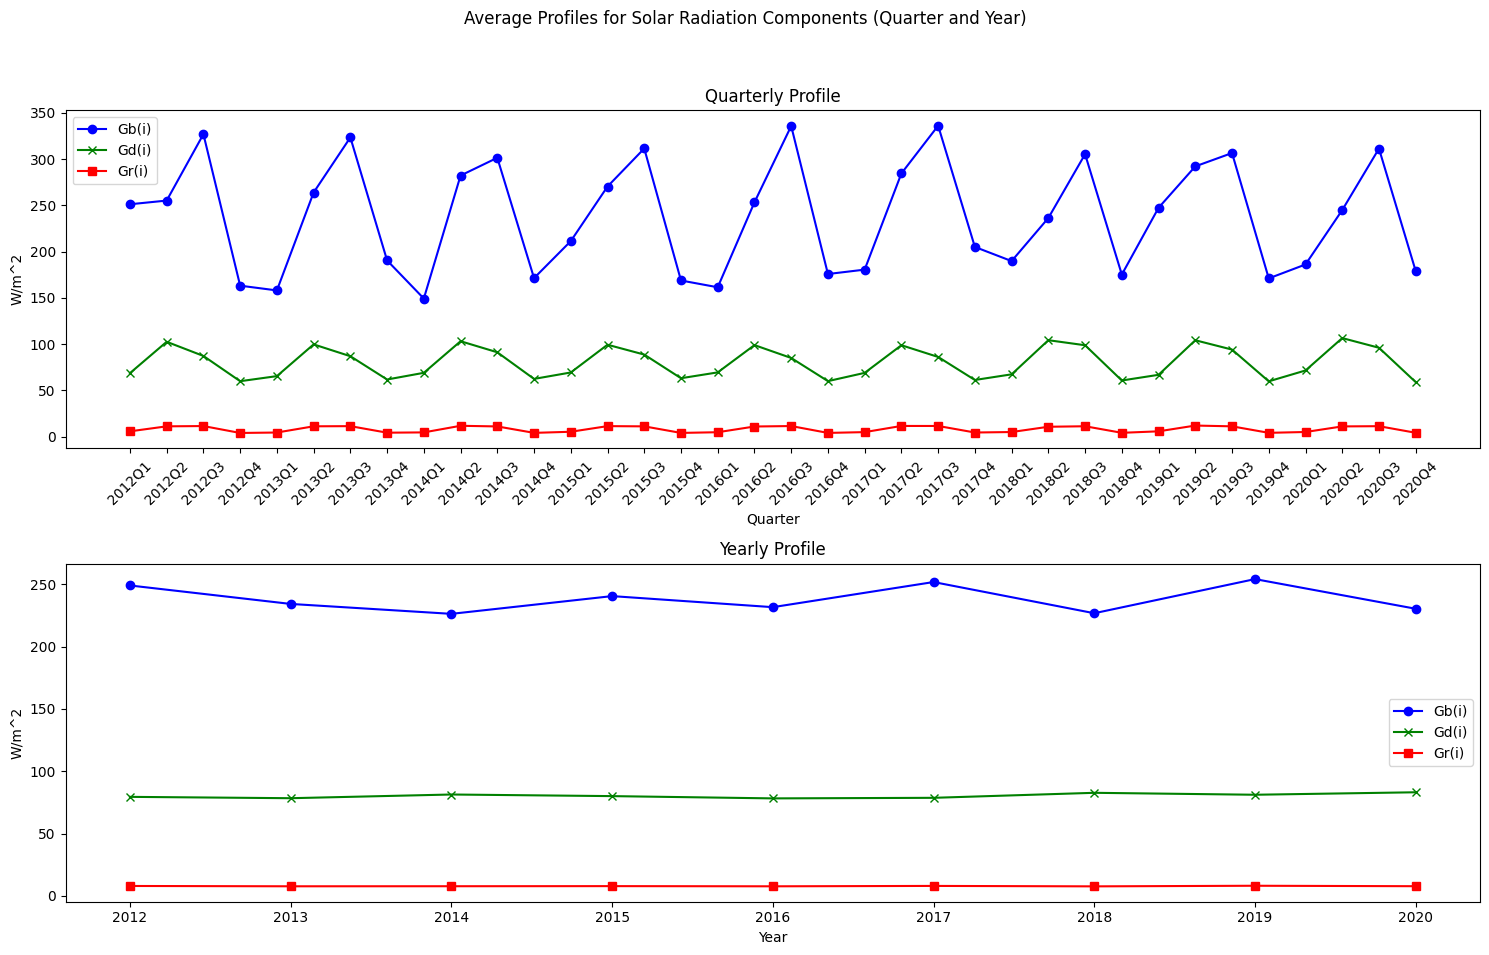

In [ ]:
# Quarterly Profile
quarterly_avg = df_filtered.groupby(df_filtered.index.to_period("Q")).mean()

# Yearly Profile
#... continue

# Plotting the average profiles for Quarter and Year
#... continue

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

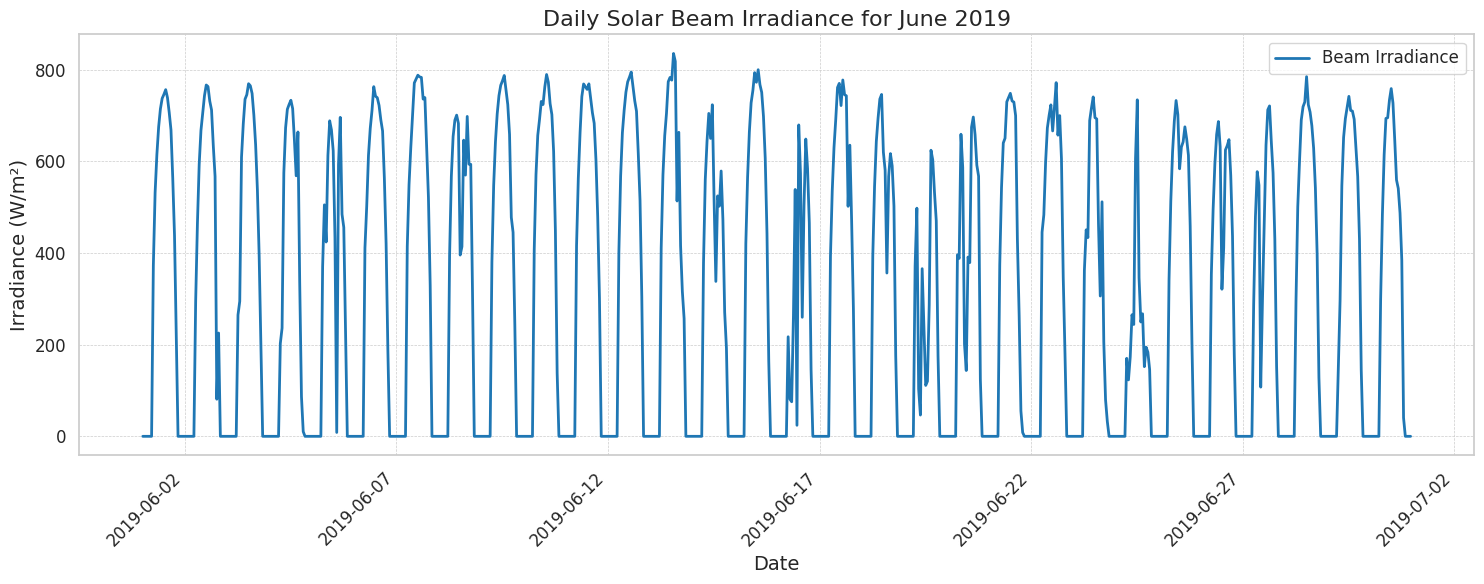

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Select a one-month period for detailed plotting
df_month = df_filtered['2019-06-01':'2019-06-30']

# Plotting the detailed time-series for one month
#... continue

# Show the plot
plt.show()

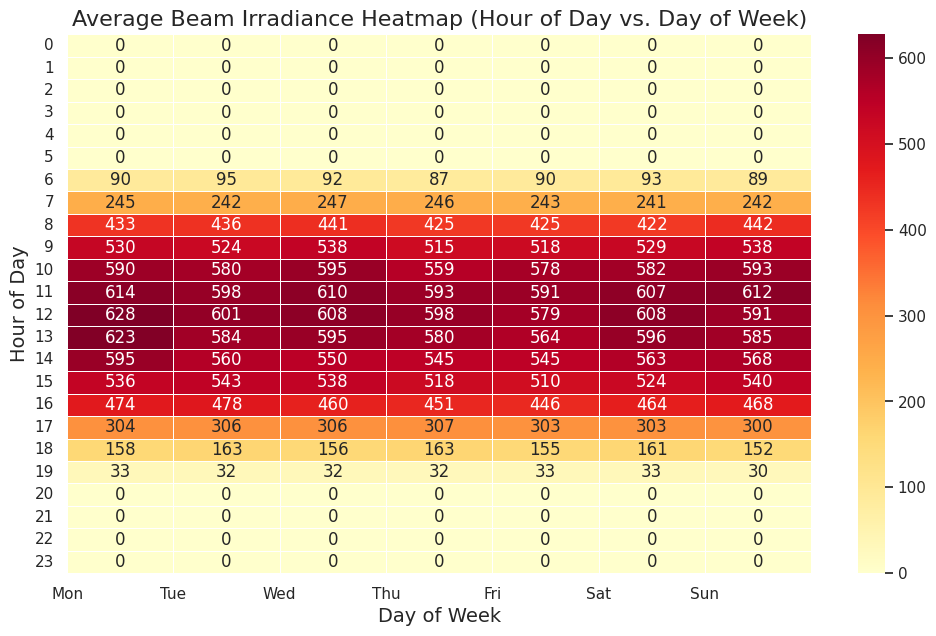

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by hour and day for heatmap data
#... continue

# Plotting the heatmap
#... continue
plt.show()

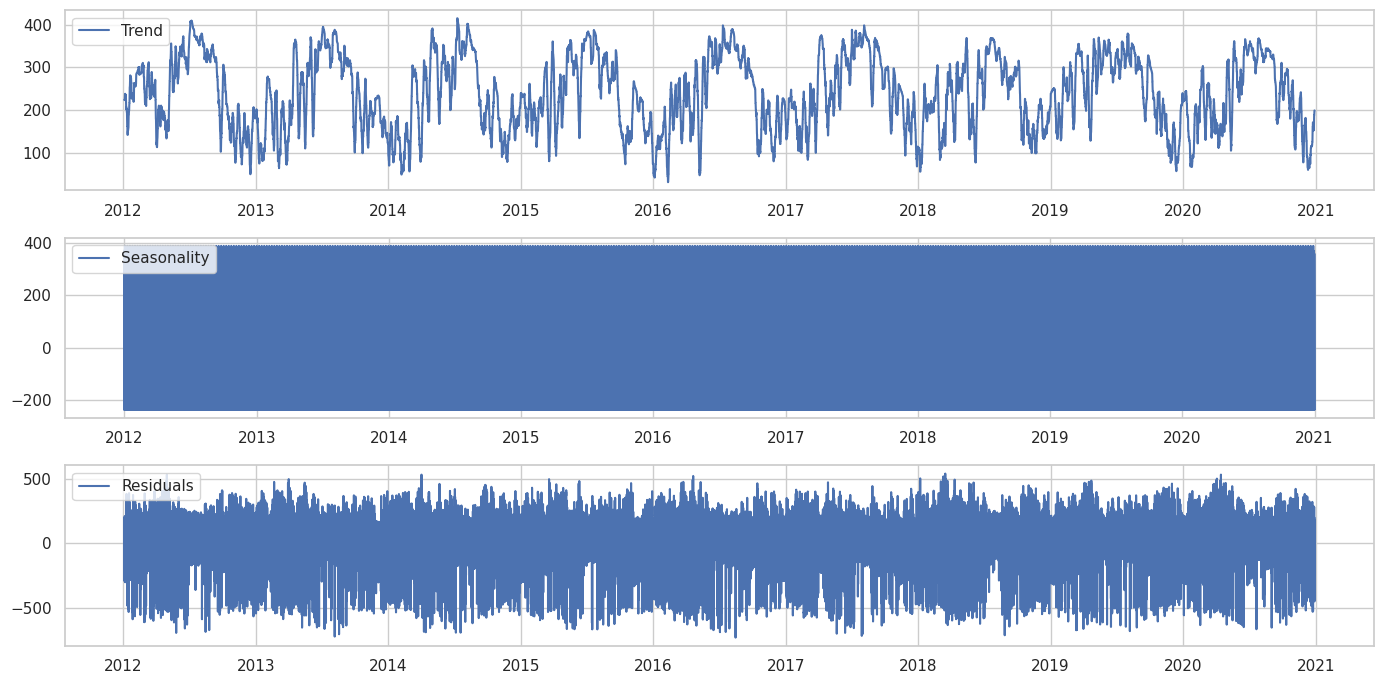

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the 'Gb(i)' series on a weekly basis
#... continue

# Plotting the decomposed components of the time series
#... continue

plt.tight_layout()
plt.show()

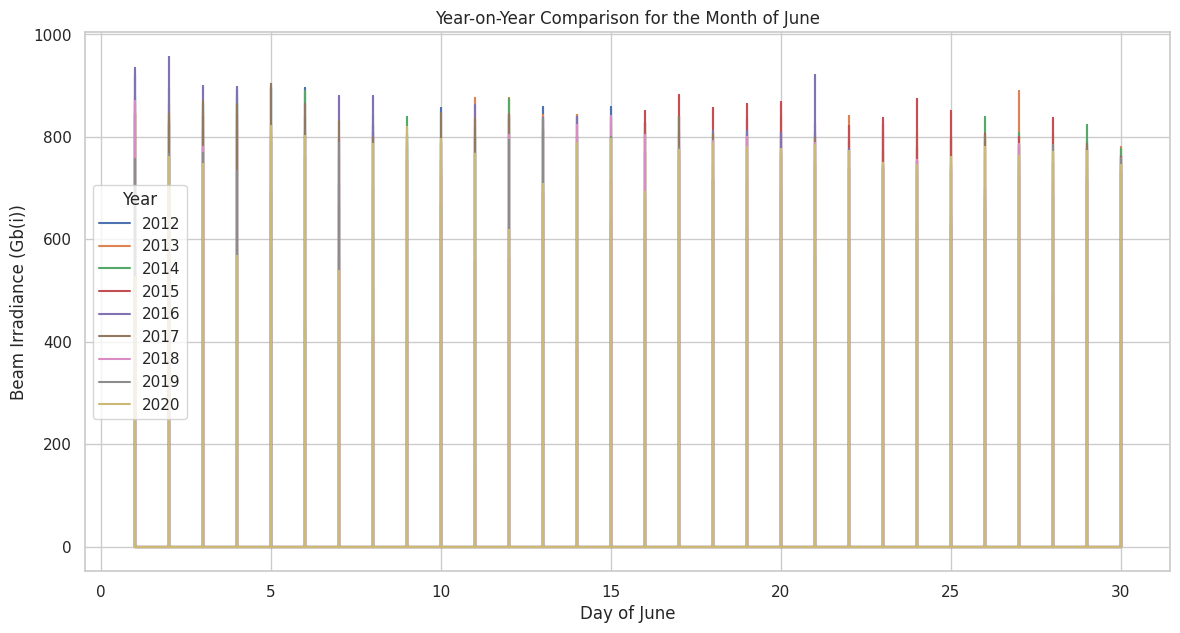

In [ ]:
# Year-on-Year comparison for a specific month (e.g., June across all years)
plt.figure(figsize=(14, 7))

for year in range(2012, 2021):
#... continue
plt.show()

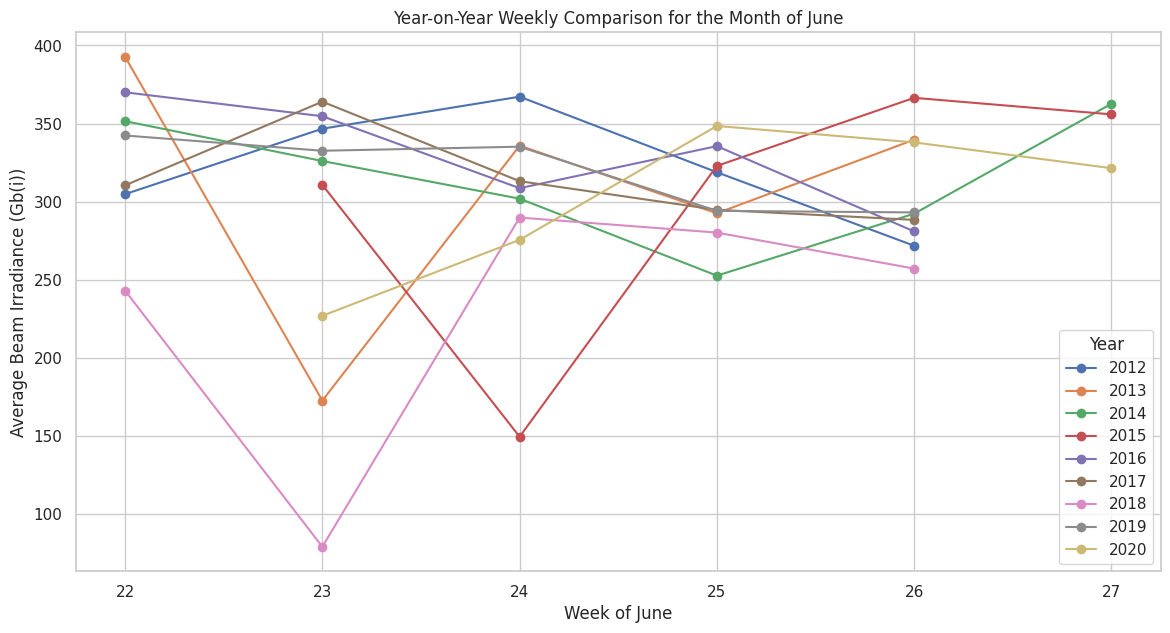

In [ ]:
plt.figure(figsize=(14, 7))

# Plotting weekly data for June across different years
for year in range(2012, 2021):
#... continue
plt.show()

<ipython-input-35-599ab11a4bff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Gb(i)_cumsum'] = df_filtered['Gb(i)'].cumsum()


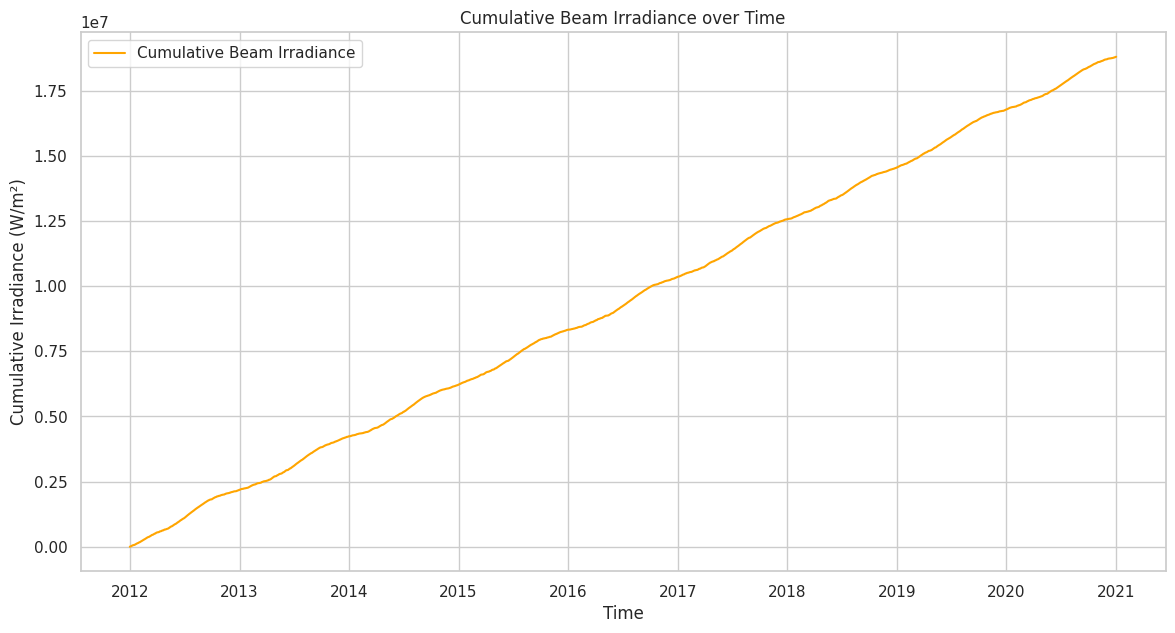

In [ ]:
plt.figure(figsize=(14, 7))

# Calculating cumulative sum of Gb(i)
#... continue

# Plotting the cumulative sum
#... continue
plt.show()

In [ ]:
import plotly.graph_objects as go

# Filter the data for summer quarter (Q3) of 2018
start_date = '2018-05-01'
end_date = '2018-08-30'

#... continue

# Create the candlestick chart
#... continue

fig.show()

## Distribution Analysis

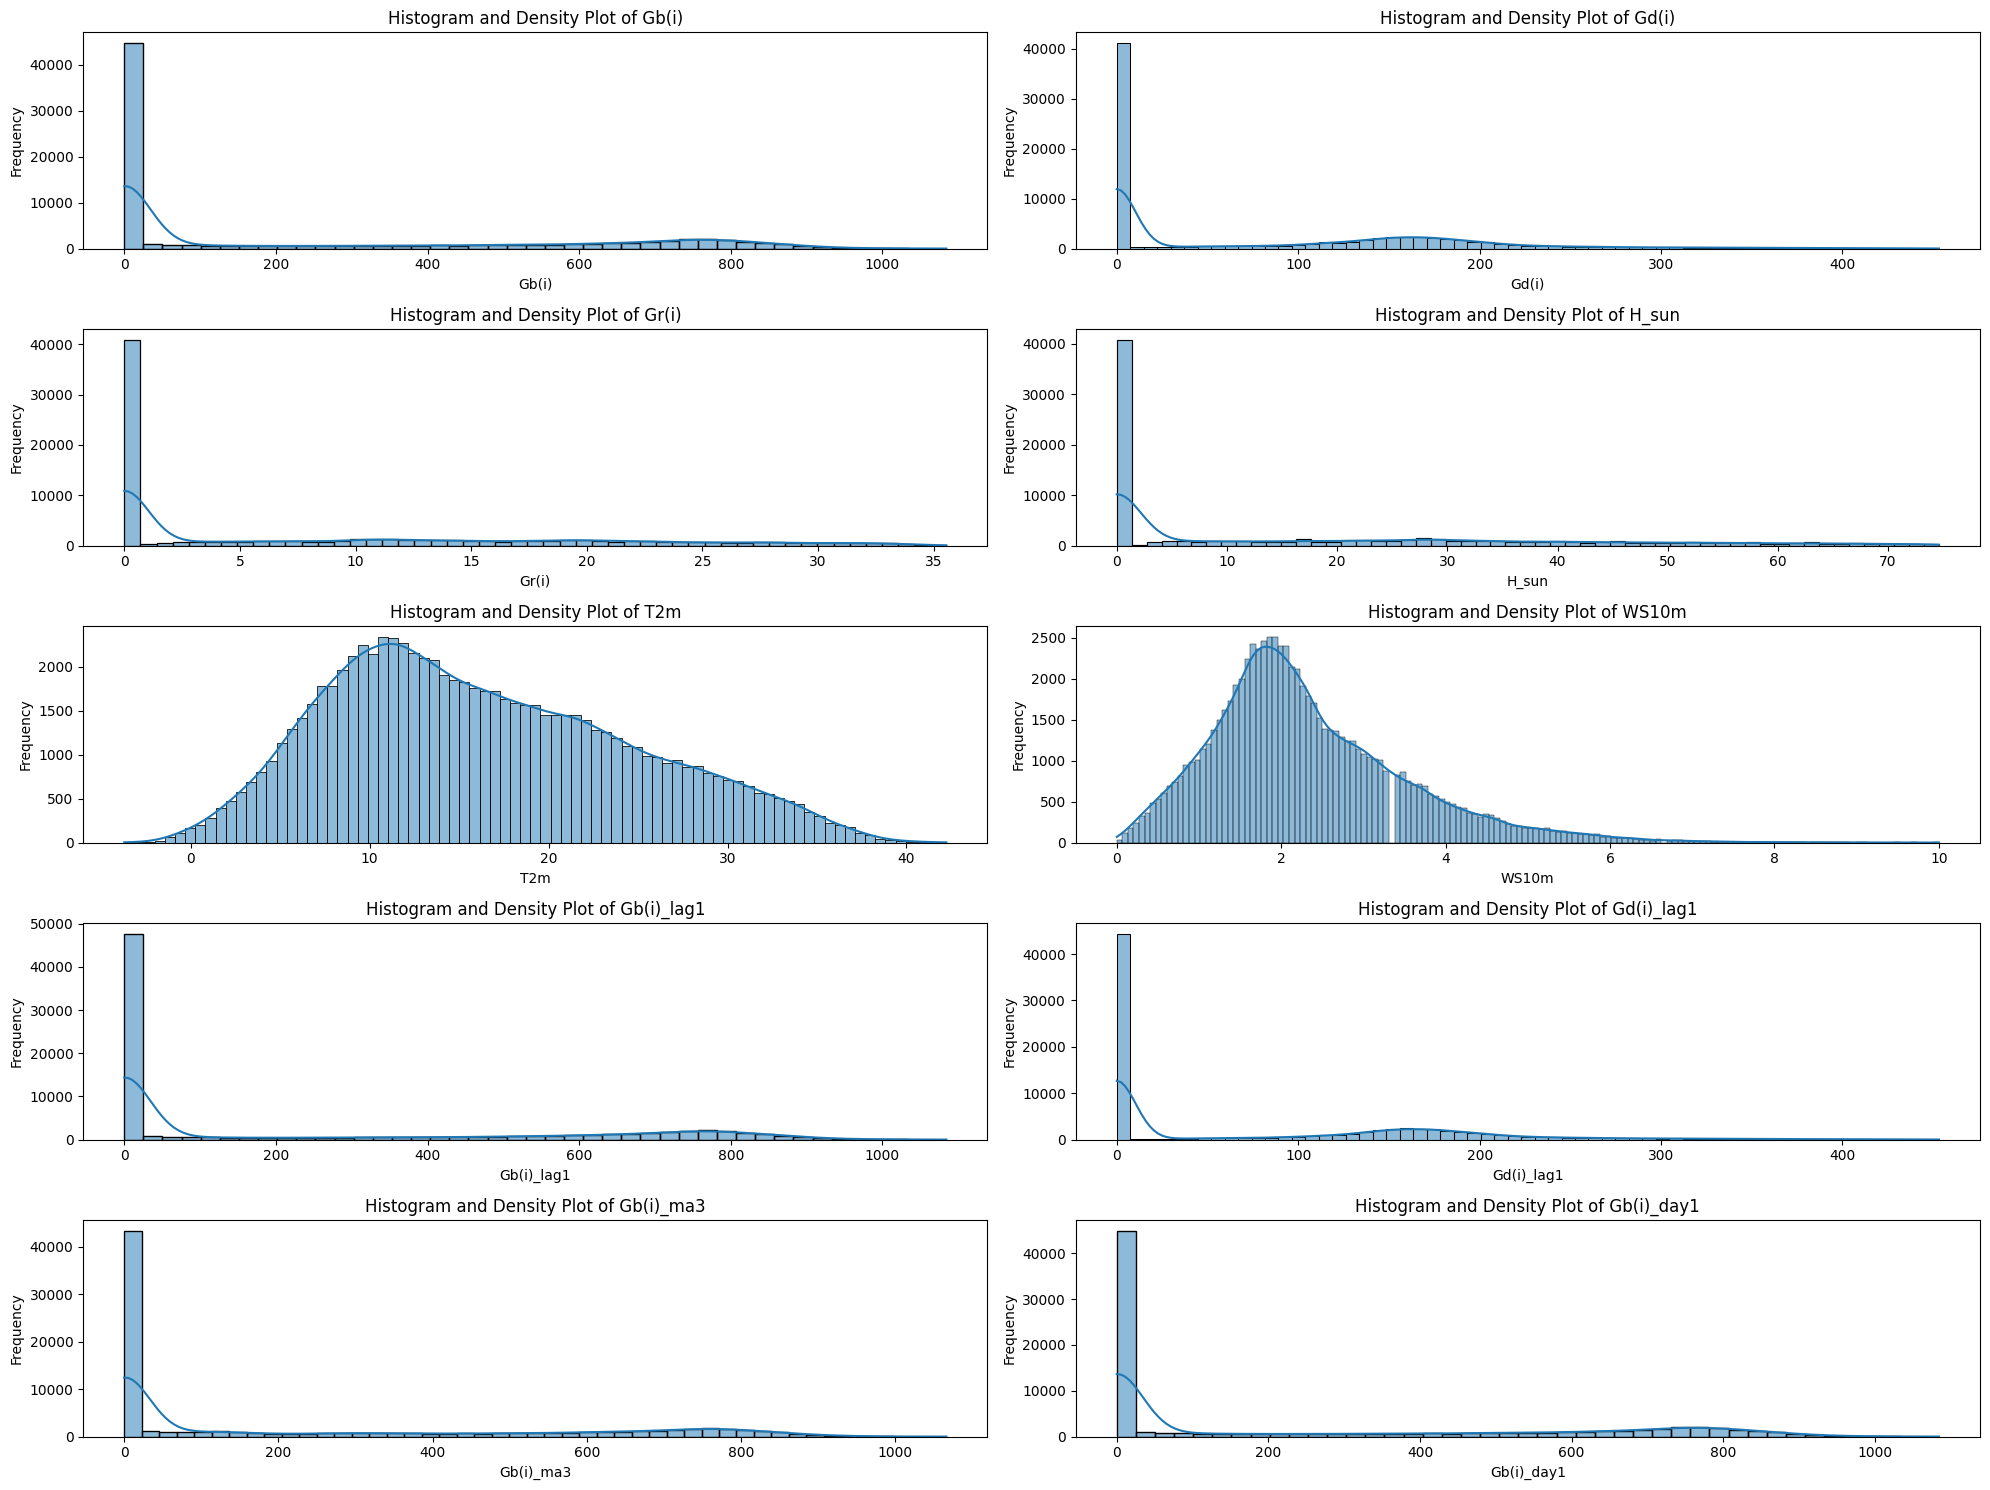

In [ ]:
import seaborn as sns

# Select a subset of columns for histogram and density plots
#... continue

plt.tight_layout()
plt.show()

### Observations:

Original Features:
  - Gb(i), Gd(i), and Gr(i) exhibit right-skewed distributions, with peaks close to zero. This is expected given that solar irradiance values are generally high during the day and zero at night.
  - H_sun shows also show right-skewed distributions, which is likely due to the sun rising and setting.
  - T2m (temperature) and WS10m (wind speed) appear to be approximately normally distributed.

Engineered Features:
  - Gb(i)_lag1 and Gd(i)_lag1 also show right-skewed distributions, similar to their original variables.
  - Gb(i)_ma3 shows a smoother right-skewed distribution, indicating that the moving average has smoothed out some of the fluctuations.
  - Gb(i)_day1 (historical values from the previous day) resembles its original distribution but with some smoothness.

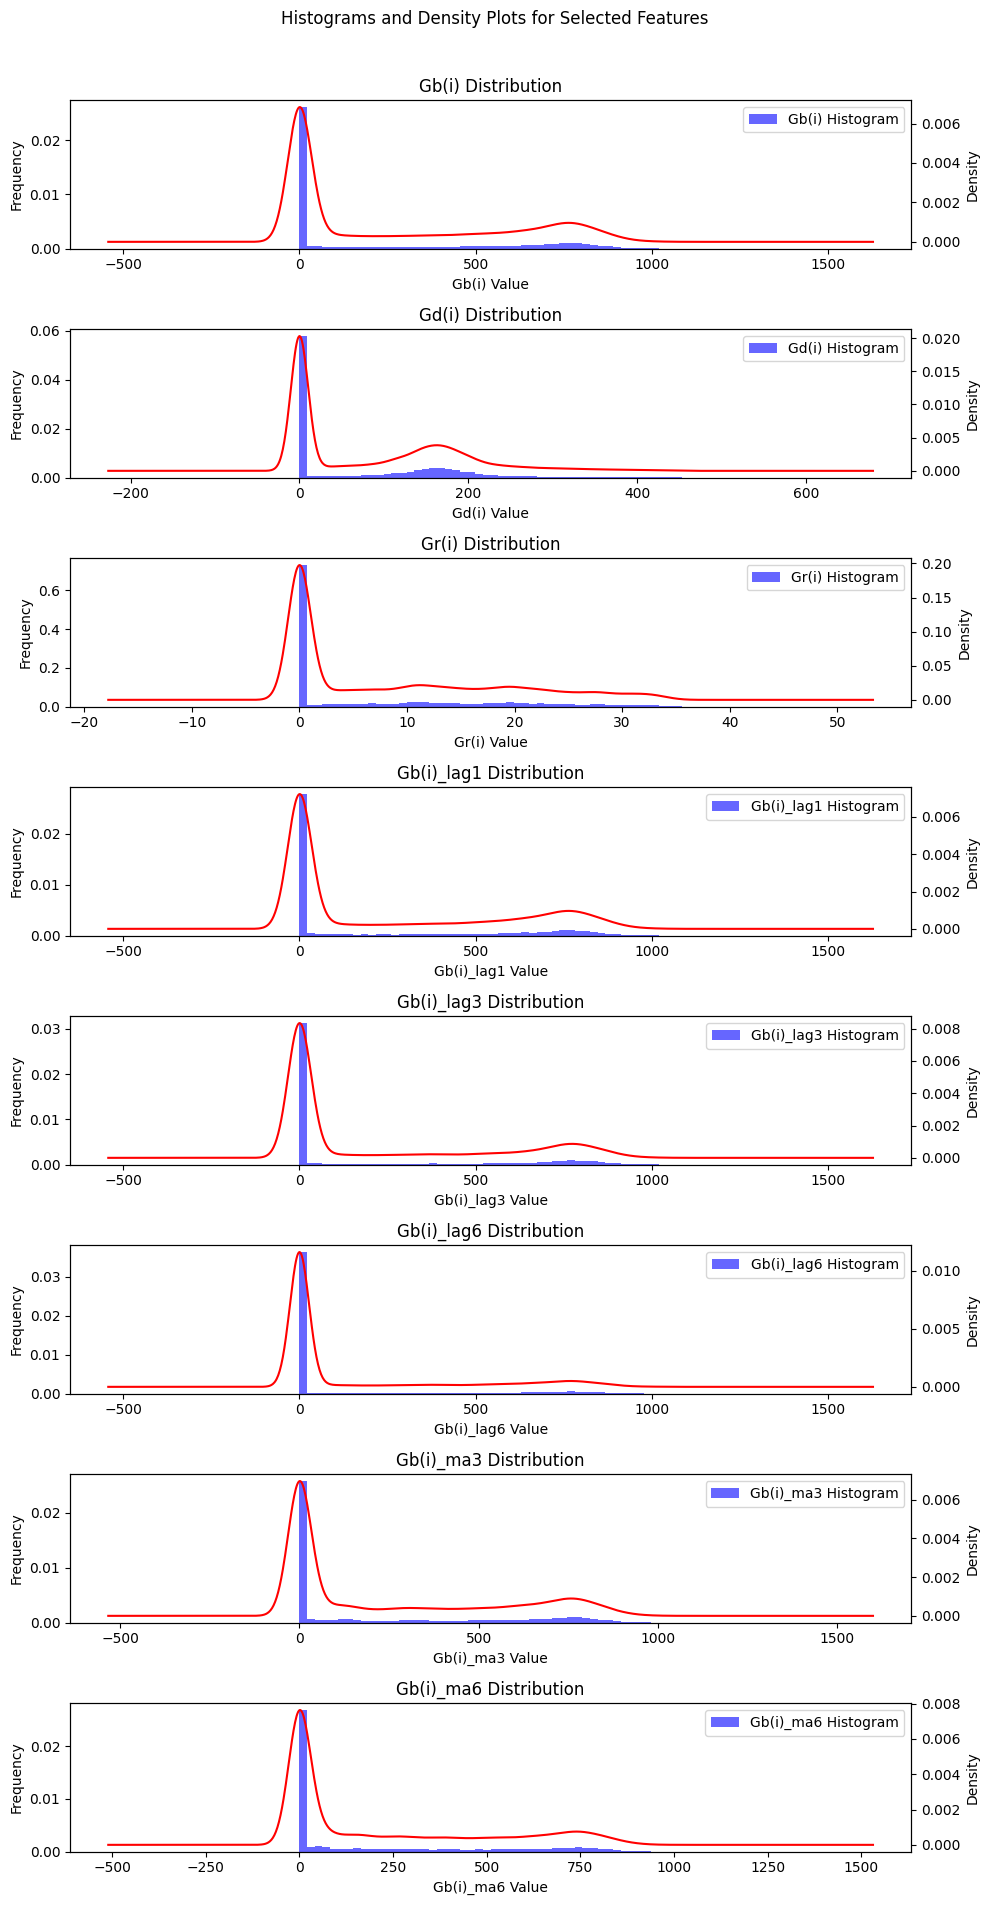

In [ ]:
# Plotting Histograms and Density Plots for selected features
#... continue
plt.show()

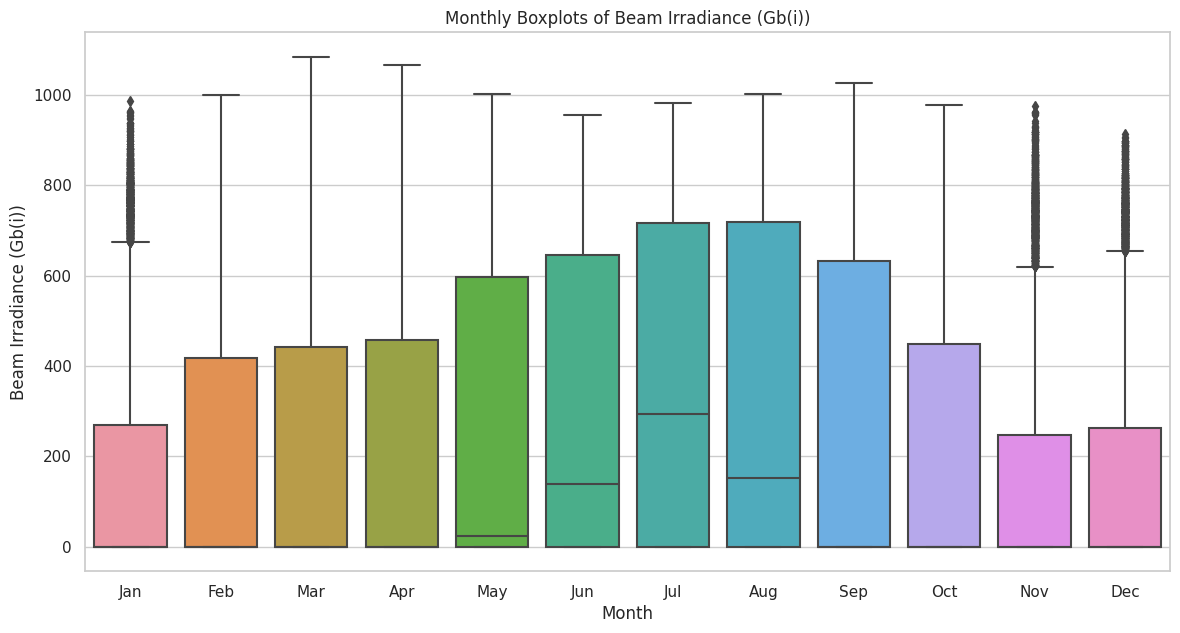

In [ ]:
plt.figure(figsize=(14, 7))

# Creating boxplots for each month
#... continue
plt.show()

In [ ]:
import plotly.graph_objects as go

# Group by year and month to get the total irradiance
#... continue

# Create labels and parents for the sunburst chart
#... continue

fig.show()

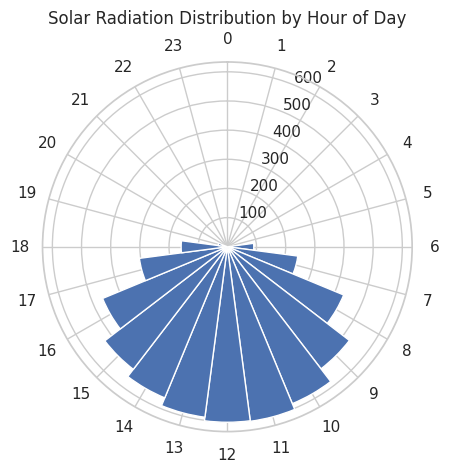

In [ ]:
import numpy as np

# Data preparation for polar bar chart
#... continue

plt.show()

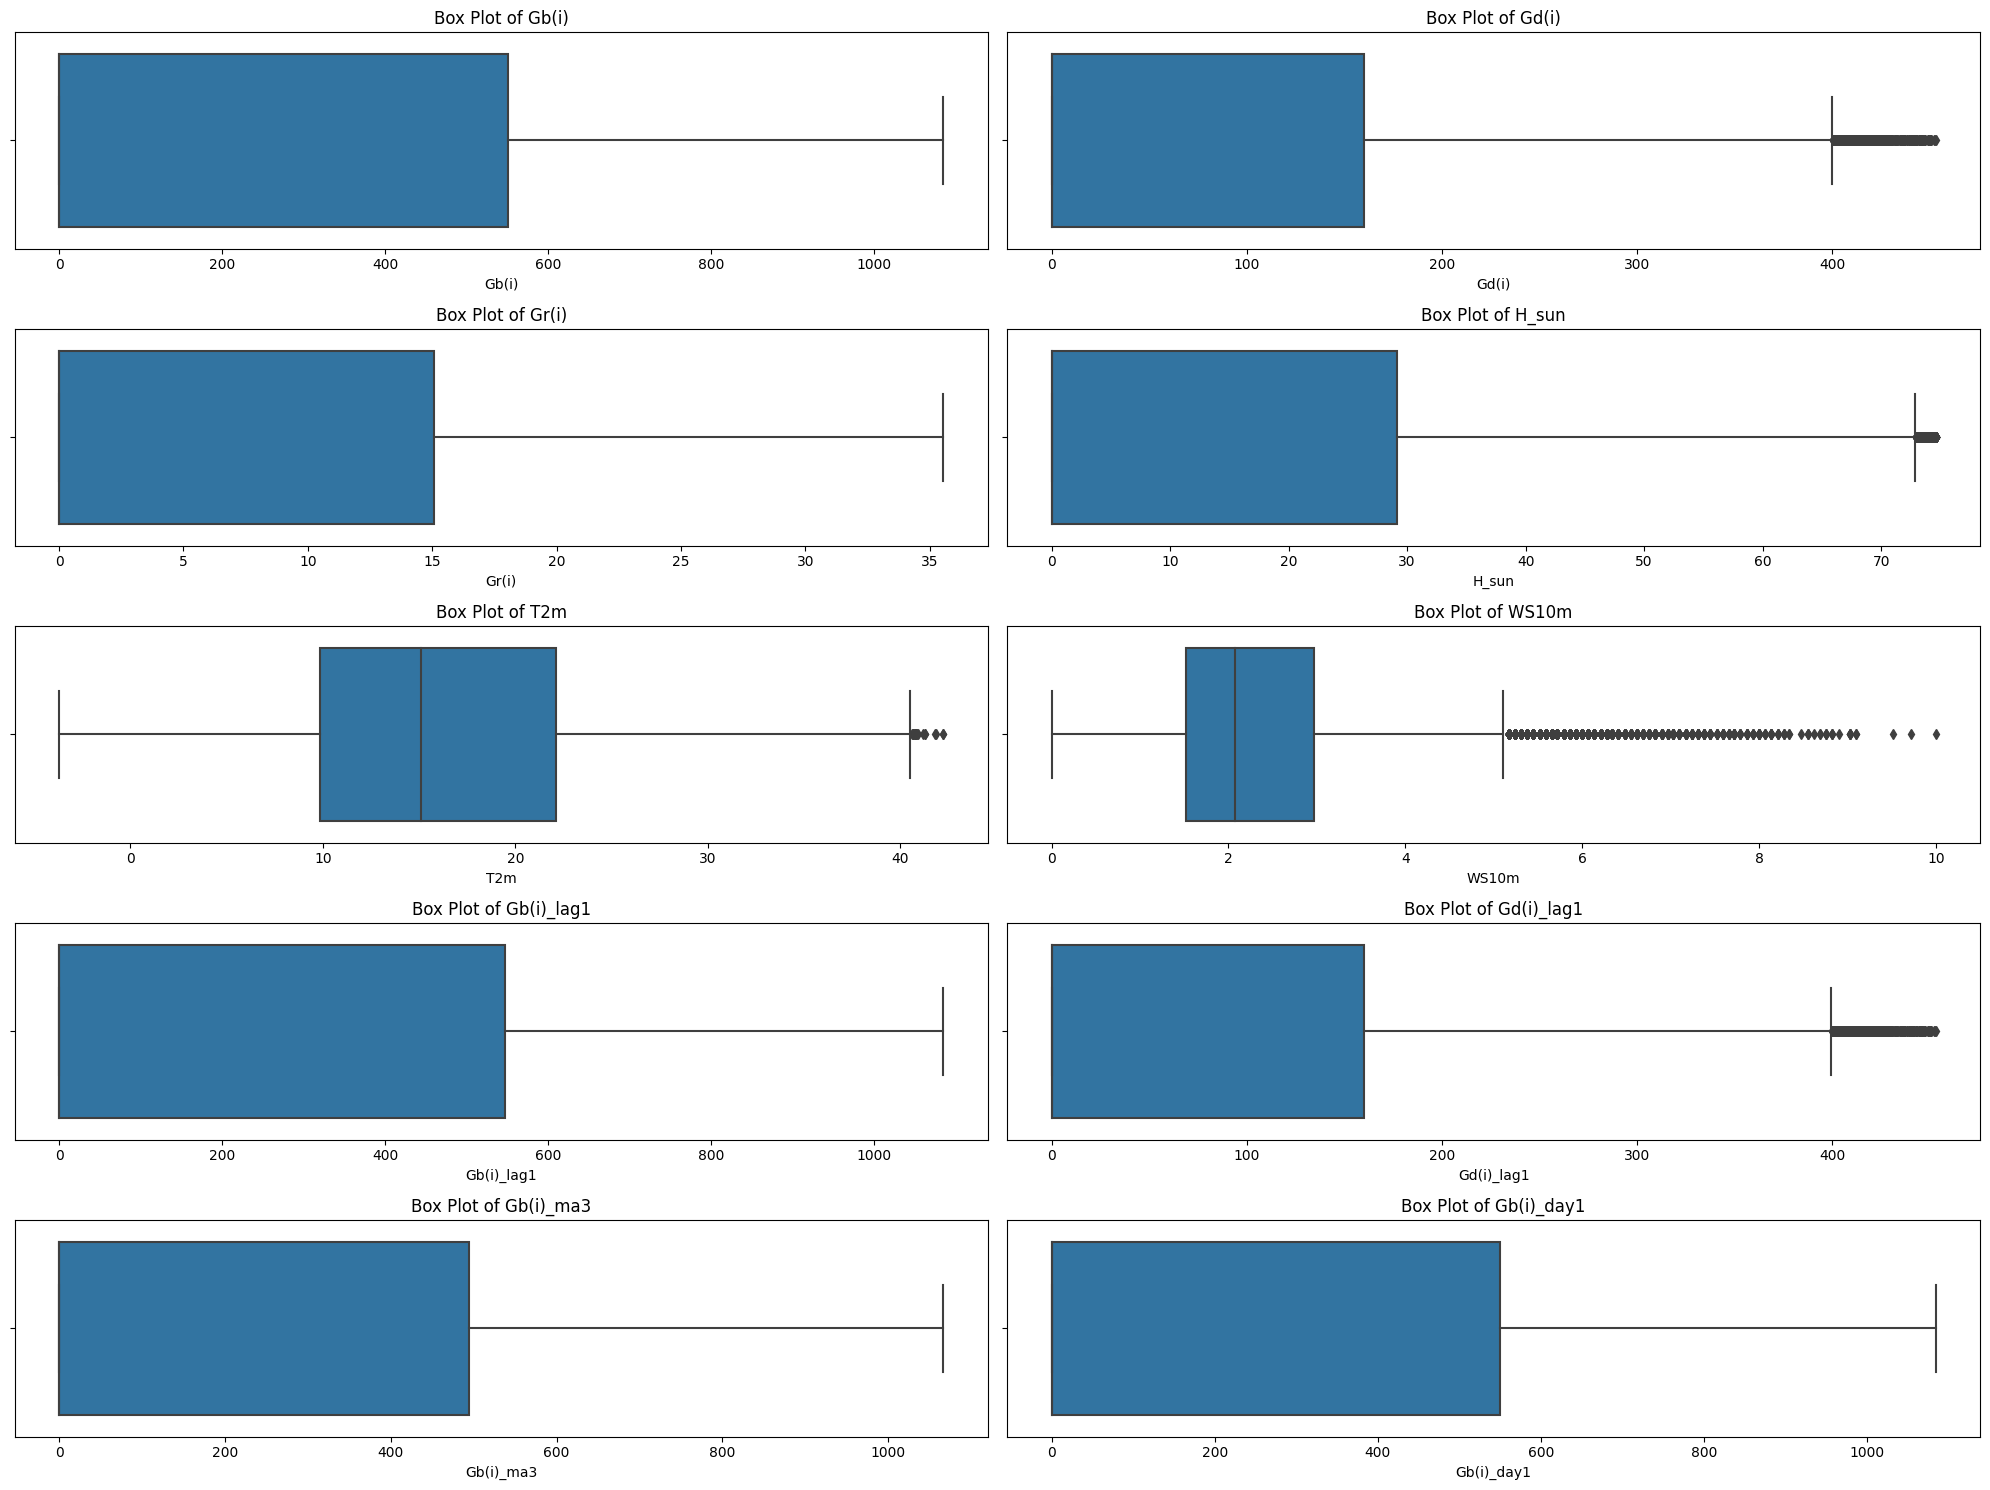

In [ ]:
# Box plots for selected columns to analyze spread and identify outliers
#... continue
plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Aggregate the data by mean, median, sum, etc., to ensure uniqueness
#... continue

fig.show()

In [ ]:
import plotly.express as px

# For a Bubble Chart, we'll use Gb(i) and Gd(i) for the axes and WS10m for the size of the bubbles
#... continue

fig.show()

## Correlation Analysis

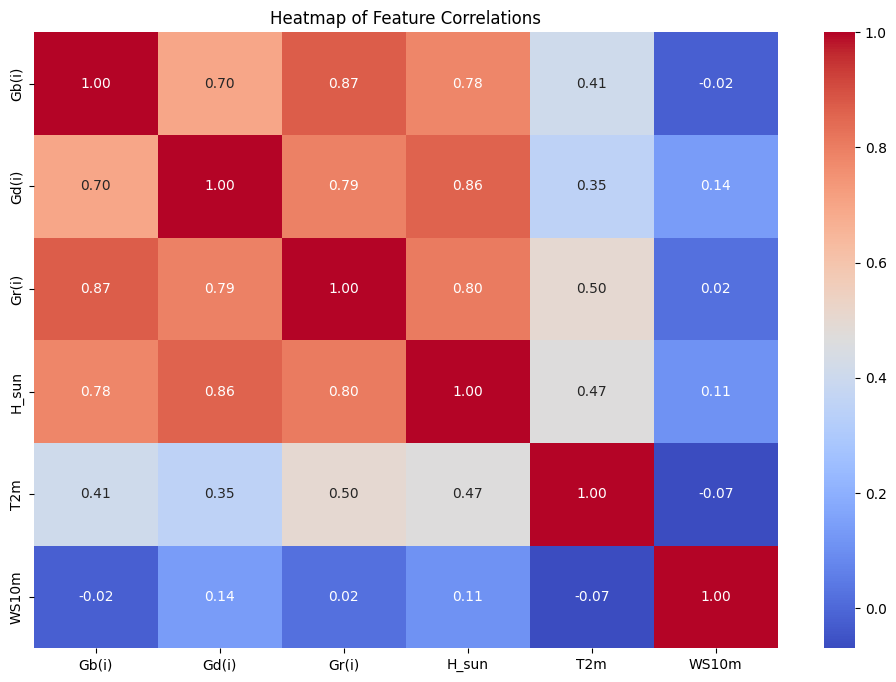

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of columns for correlation analysis
#... continue
plt.show()

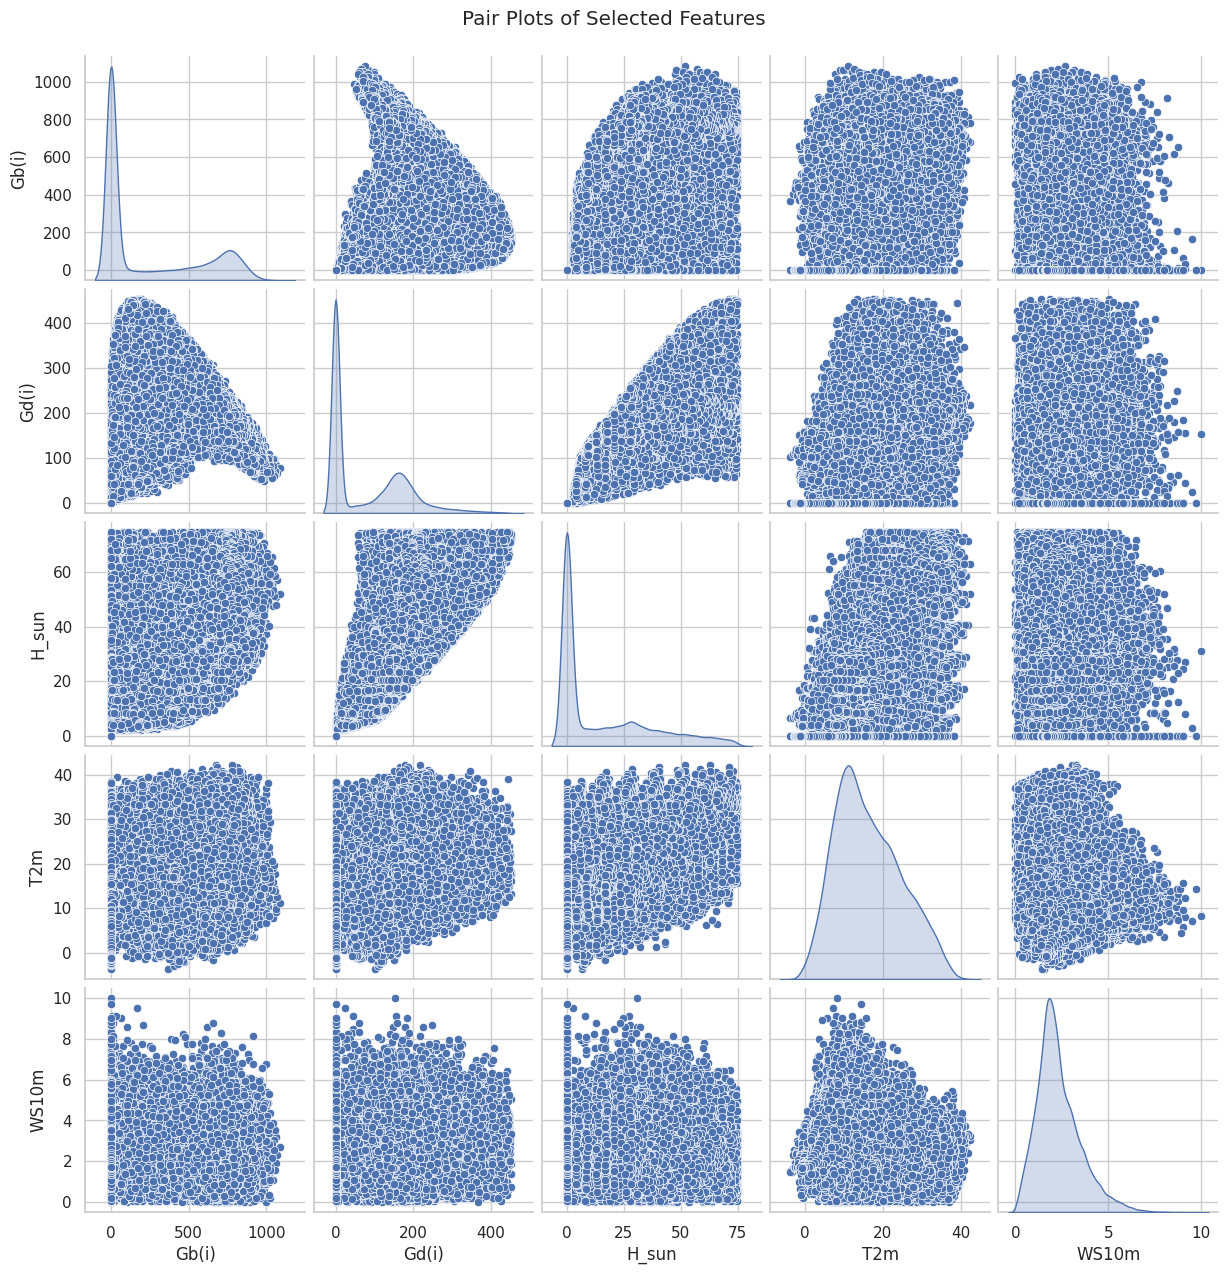

In [ ]:
# Select a subset of columns for pair plots
#... continue
plt.show()

## Statistical Tests

In [ ]:
from statsmodels.tsa.stattools import adfuller
from scipy.stats import normaltest

# Initialize a dictionary to store test results
stat_test_results = {}

# Augmented Dickey-Fuller Test for Stationarity
#... continue

stat_test_results

{'ADF': {'Gb(i)': {'ADF Statistic': -20.21935830051433,
   'p-value': 0.0,
   'Critical Values': {'1%': -3.430432939273607,
    '5%': -2.861576657751156,
    '10%': -2.566789511657082}},
  'Gd(i)': {'ADF Statistic': -14.426780106129256,
   'p-value': 7.748414725415611e-27,
   'Critical Values': {'1%': -3.430432929807266,
    '5%': -2.8615766535672527,
    '10%': -2.5667895094301243}},
  'Gr(i)': {'ADF Statistic': -8.216196794898924,
   'p-value': 6.61415811064123e-13,
   'Critical Values': {'1%': -3.430432939273607,
    '5%': -2.861576657751156,
    '10%': -2.566789511657082}}},
 'Normality': {'Gb(i)': {'Statistic': 22091.930912852113, 'p-value': 0.0},
  'Gd(i)': {'Statistic': 8422.724445336105, 'p-value': 0.0},
  'Gr(i)': {'Statistic': 9743.293543426586, 'p-value': 0.0}}}

### Augmented Dickey-Fuller (ADF) Test for Stationarity

1. **Gb(i)**:
    - ADF Statistic: -20.22
    - p-value: 0.0
    - The ADF statistic is far less than the critical values at all confidence levels (1%, 5%, and 10%), and the p-value is zero. This strongly suggests that the series is stationary.

2. **Gd(i)**:
    - ADF Statistic: -14.43
    - p-value: \(7.75 \times 10^{-27}\)
    - Similar to `Gb(i)`, the ADF statistic is far less than the critical values, and the p-value is practically zero. The series appears to be stationary.

3. **Gr(i)**:
    - ADF Statistic: -8.22
    - p-value: \(6.61 \times 10^{-13}\)
    - Although the ADF statistic is smaller in magnitude compared to `Gb(i)` and `Gd(i)`, it is still less than the critical values, and the p-value is extremely low. The series is likely stationary.

### D'Agostino and Pearson's Test for Normality

1. **Gb(i)**, **Gd(i)**, **Gr(i)**:
    - Statistics: 22091.93, 8422.72, 9743.29 respectively
    - p-value: 0.0 for all
    - The extremely high statistics and zero p-values strongly indicate that these distributions are not normal.

#### Summary

- All three irradiance features (`Gb(i)`, `Gd(i)`, and `Gr(i)`) are stationary, which is advantageous for time-series modeling.
- None of the features follow a normal distribution, which is important to know when selecting or configuring statistical models that assume normally distributed residuals.

## Specialized Time-Series Techniques

### Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plots:

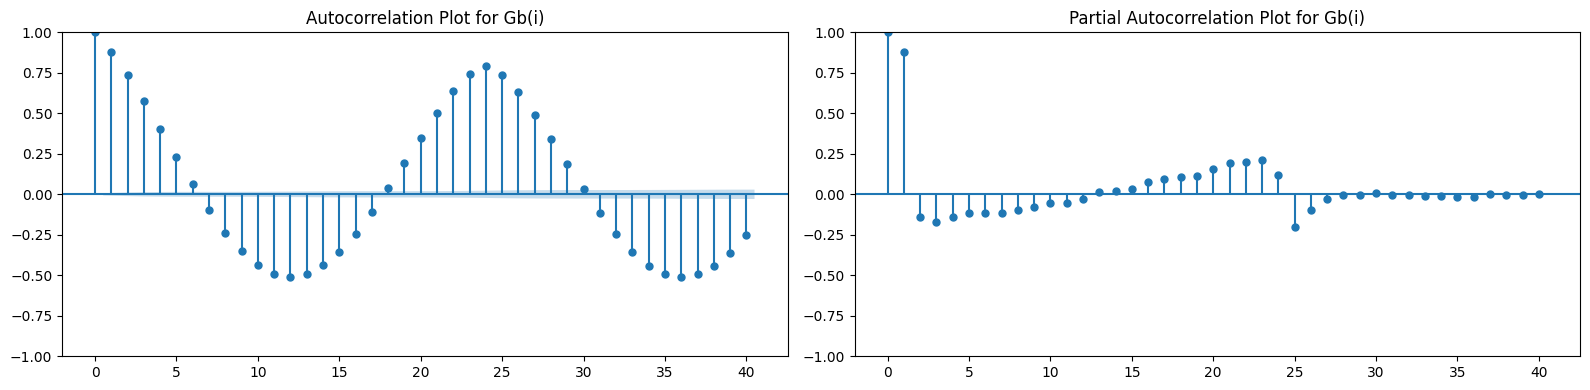

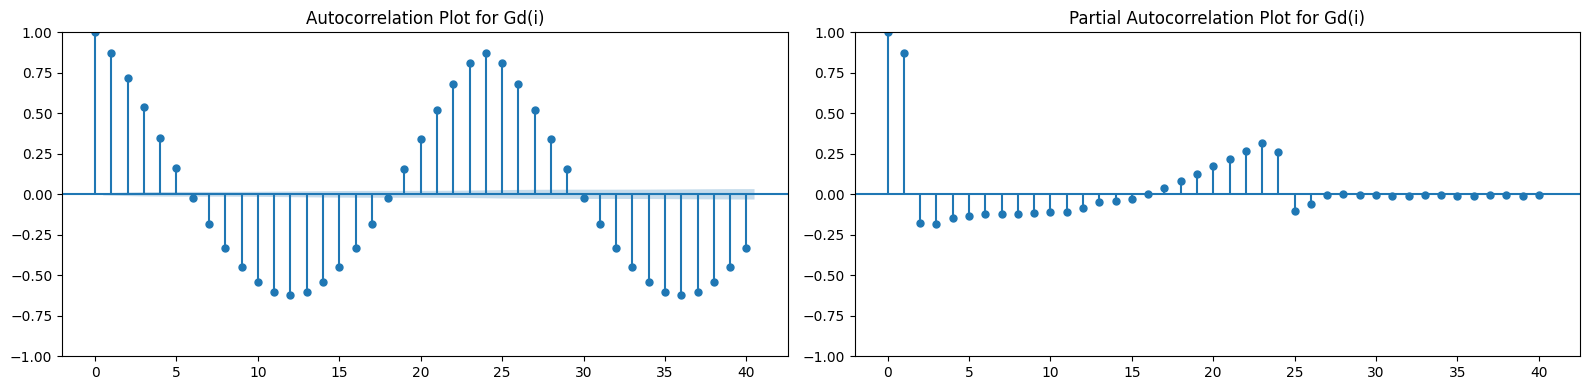

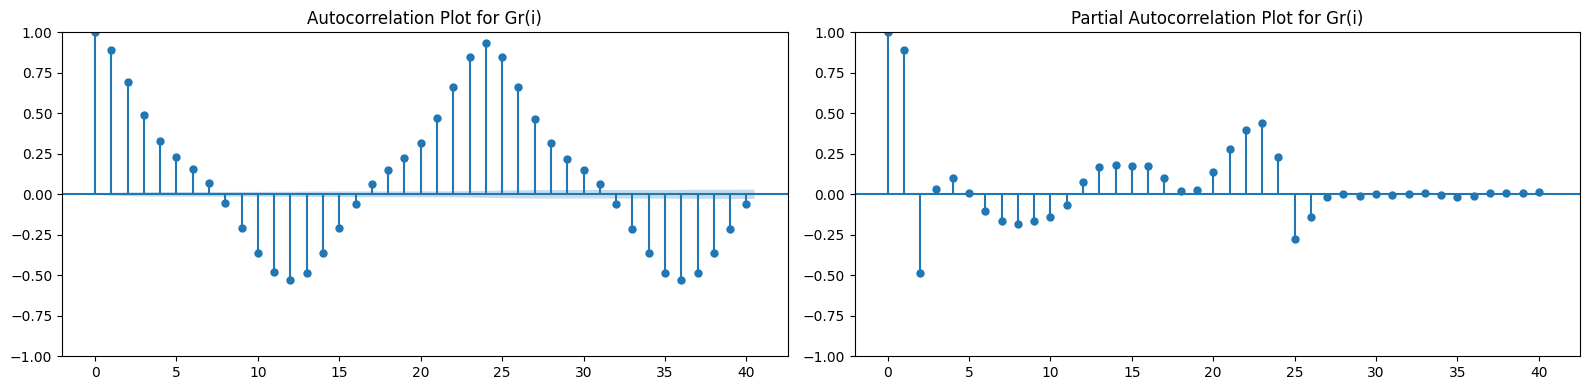

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Selected features for autocorrelation and partial autocorrelation analysis
#... continue

    plt.tight_layout()
    plt.show()

### Key observations:

Gb(i) (Beam Irradiance):
  - The ACF plot shows significant autocorrelations up to lag 1, then some minor peaks at later lags, suggesting that the current value is most strongly related to its immediate past value.
  - The PACF plot shows a significant spike at lag 1, confirming the immediate past value's strong influence.

Gd(i) (Diffuse Irradiance):
  - The ACF plot is similar to that of Gb(i), with significant autocorrelations at lag 1.
  - The PACF plot also shows a significant spike at lag 1, indicating strong correlation with the immediate past value.

Gr(i) (Reflected Irradiance):
  - The ACF plot shows a notable peak at lag 1, with minor peaks at later lags.
  - The PACF plot also confirms the influence of the immediate past value with a significant spike at lag 1.

The ACF and PACF plots suggest that lag 1 is particularly important for all three irradiance features, which validates the choice of lagged features in the feature engineering step.

## Spectral analysis

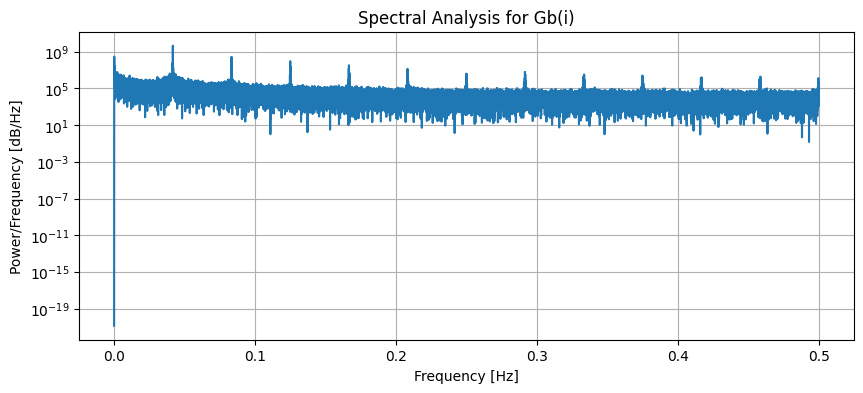

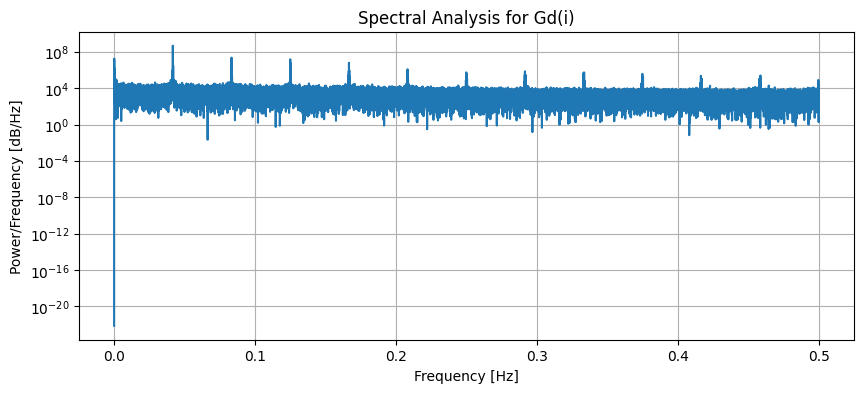

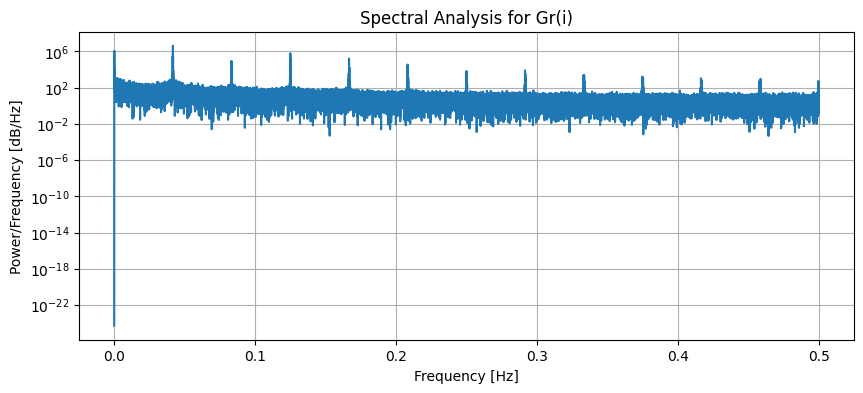

In [ ]:
from scipy.signal import periodogram

# Initialize a dictionary to store spectral analysis results
spectral_results = {}

# Perform Spectral Analysis for selected features: 'Gb(i)', 'Gd(i)', 'Gr(i)'
#... continue
    plt.show()

### Fourier Transform (FFT)

In [ ]:
from scipy.fft import fft

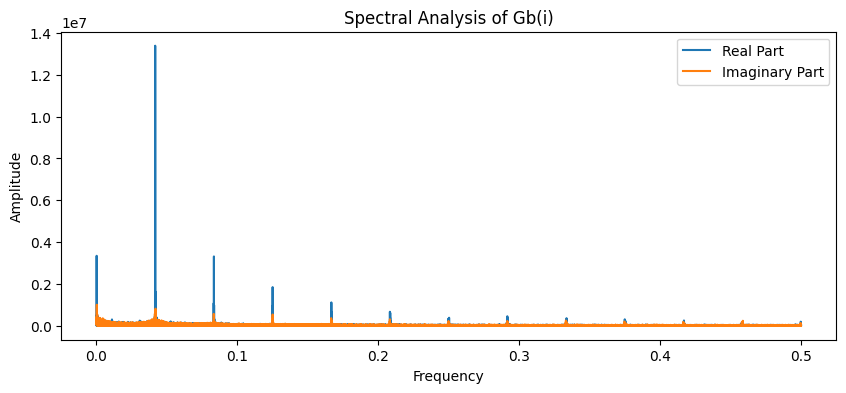

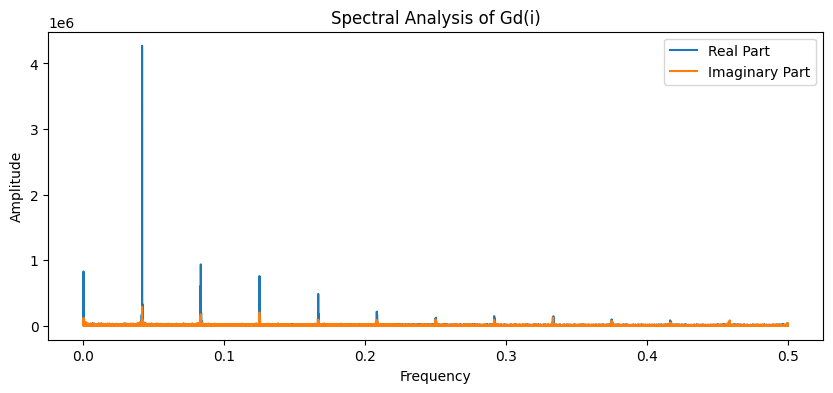

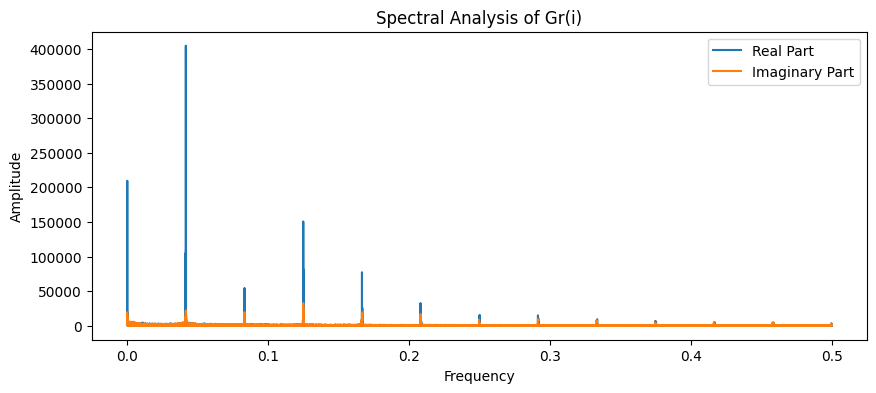

In [ ]:
# Perform Fast Fourier Transform (FFT) after converting the Pandas Series to NumPy array
#... continue
    plt.show()

## Anomaly Detection

In [ ]:
import numpy as np

# Initialize a dictionary to store anomaly detection results
anomaly_results = {}

# Z-Score based Anomaly Detection
#... continue

# Tukey Fences based Anomaly Detection
#... continue

anomaly_counts

{'Method': ['Z-Score', 'Tukey'],
 'Gb(i)': [0, 0],
 'Gd(i)': [680, 381],
 'Gr(i)': [0, 0]}

### The results of the anomaly detection methods are as follows:

In [ ]:
# Calculate the percentage of anomalies in relation to the total sampled dataset for Gd(i)
#... continue

percentage_anomalies_z_score, percentage_anomalies_tukey

(0.8617193836171938, 0.48281630170316303)

In [ ]:
# I'll perform data imputation for the anomalies detected in the Gd(i) feature
# I'll use the median for imputation as it is less sensitive to outliers than the mean

#... continue

array([0.])

# Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
#... continue


# Model building and Evaluation

## Random Forest

#### Validation Metrics:

In [ ]:
# Importing necessary libraries for model building
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Initialize and train the Random Forest Regressor model
#... continue

# Make predictions on the validation set
#... continue

# Evaluate the model performance on the validation set
#... continue

mae, mse, rmse, r2

(9.129882493822468, 576.3983135068771, 24.008296763970517, 0.9945345751143794)

#### Test Metrics:

In [ ]:
# Make predictions on the test set
#... continue

# Evaluate the model performance on the test set
#... continue

mae_test, mse_test, rmse_test, r2_test

(9.802244345181522, 620.3360332806748, 24.90654599258345, 0.9940022165664804)

### Statistical Testing

Conducting a t-test to compare the predicted and actual values on the test set

In [ ]:
from scipy.stats import ttest_ind

# Null Hypothesis: The means of the predicted and actual values are equal
# Alternative Hypothesis: The means of the predicted and actual values are different

#... continue

# Using a 95% confidence interval to reject or fail to reject the null hypothesis
#... continue

t_stat, p_value, hypothesis_result

(0.3415342376879538,
 0.7327037082304212,
 'Fail to Reject the Null Hypothesis: There is no statistical difference between the means of the predicted and actual values.')

## XGBoost Model

### Validation Metrics:

In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost model
#... continue

# Make predictions on the validation set
#... continue

# Evaluate the model performance on the validation set
#... continue

mae_xgb, mse_xgb, rmse_xgb, r2_xgb

(9.360499589284554, 472.77737459562513, 21.743444405052873, 0.9955171117473395)

### Test Metrics:

In [ ]:
# Make predictions on the test set using the XGBoost model
#... continue

# Evaluate the model performance on the test set
#... continue

mae_test_xgb, mse_test_xgb, rmse_test_xgb, r2_test_xgb


(9.749307188910963, 477.6388213197055, 21.854949584011983, 0.995381899396418)

### Statistical Testing

In [ ]:
# Conduct a t-test to compare the predicted and actual values on the test set for the XGBoost model
# Null Hypothesis: The means of the predicted and actual values are equal
# Alternative Hypothesis: The means of the predicted and actual values are different

#... continue

# Using a 95% confidence interval to reject or fail to reject the null hypothesis
#... continue

t_stat_xgb, p_value_xgb, hypothesis_result_xgb

(0.37790882880153637,
 0.7055008647396876,
 'Fail to Reject the Null Hypothesis: There is no statistical difference between the means of the predicted and actual values.')

T-Test Result: The p-value of 0.7060.706 suggests that we fail to reject the null hypothesis at the 95% confidence level. This indicates that the predicted and actual values' means do not statistically differ, reinforcing the model's accuracy.

## **Comparative Analysis: Random Forest and XGBoost Models**

**Performance**: Both models perform similarly well, but XGBoost has a slightly higher R-squared value on the validation set.

**Feature Importance**: While both models identify Gr(i) and Gb(i)_ma3 as important, their importances are distributed more evenly in the XGBoost model.

**Computational Efficiency**: XGBoost is generally faster and requires less memory than Random Forest, which can be an advantage in a production environment.

**In summary, both the Random Forest and XGBoost models are highly accurate in predicting solar irradiance, and their feature importance analyses provide valuable insights into the most predictive features. The choice between the two could be based on specific use-cases, computational resources, or preference for interpretability.**

## GradientBoostingRegressor  Model

### Validation Metrics:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the GradientBoostingRegressor model
#... continue

# Make predictions on the validation set
#... continue

# Evaluate the model performance on the validation set
#... continue

mae_gb, mse_gb, rmse_gb, r2_gb

(18.98964759678633, 1612.0211905780886, 40.14998369337264, 0.984714770108313)

### Test Metrics:

In [ ]:
# Given that the code state was reset, and assuming the GradientBoostingRegressor model was trained as `gb_model`
# We would typically proceed as follows for test set evaluation and feature importance analysis:

# Make predictions on the test set using the GradientBoostingRegressor model
#... continue

# Evaluate the model performance on the test set
#... continue

mae_test_gb, mse_test_gb, rmse_test_gb, r2_test_gb

(19.89009509004849, 1730.2337576628504, 41.59607863324199, 0.983271055023284)

### Model Performance:

- MAE (Mean Absolute Error):
  
  Compared to the other models, the MAE is higher for the GradientBoostingRegressor model, nearly double the MAE from Random Forest and XGBoost models. This indicates that, on average, the model's predictions deviate by approximately 19 W/m2 from the actual values on the test set, which is not as precise as the other models.

- MSE (Mean Squared Error) and RMSE (Root Mean Squared Error):
  
  Both MSE and RMSE are also higher compared to Random Forest and XGBoost models. An RMSE of around 41 W/m2 indicates a higher level of error, again demonstrating that this model is less precise for this particular application.

- R2 Score:
  
  The R2 score is still high (above 0.98), suggesting that the model explains a large proportion of the variance in the data. However, given the high precision of Random Forest and XGBoost models (R2 above 0.99), this model seems less fitting for the dataset.

### Feature Importance:

In [ ]:
# Feature Importance Analysis using the trained GradientBoostingRegressor model
feature_importances_gb = gb_model.feature_importances_

# Create a DataFrame for the feature importances
#... continue

# Sort the features by their importances
#... continue

# Plot the top 20 most important features
#... continue

# Show the top 10 most important features
#... continue

top_10_features_gb

### Statistical Testing

Conducting a t-test to compare the predicted and actual values on the test set for the GradientBoostingRegressor model

In [ ]:
# Null Hypothesis: The means of the predicted and actual values are equal
# Alternative Hypothesis: The means of the predicted and actual values are different

#... continue

# Using a 95% confidence interval to reject or fail to reject the null hypothesis
#... continue

# Note: The above code assumes that the data and model are loaded into the variables. Since the code state was reset, the actual execution is not possible here.


(0.316547375861615,
 0.7515891649529265,
 'Fail to Reject the Null Hypothesis: There is no statistical difference between the means of the predicted and actual values.')

### Summary:

The GradientBoostingRegressor model is less precise compared to the Random Forest and XGBoost models for this specific application, as indicated by the higher MAE, MSE, and RMSE values. The R2 score, although high, is also slightly less compared to the other models. Therefore, for this particular problem, Random Forest or XGBoost may be preferable for predicting solar irradiance.

## LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from numpy import array

# Normalize the features
#... continue

# Initialize the LSTM model
#... continue

# Compile the LSTM model
#... continue

# Train the LSTM model
#... continue

# Make predictions on the validation set
#... continue

# Evaluate the model performance on the validation set using MAE
#... continue

494/494 [==============================] - 1s 2ms/step


(23.023668067203175, 23.631254196166992, 23.0236759185791)

#### Evaluation Metrics:

1. **Validation Set MAE**: 23.02 \( \text{W/m}^2 \)
2. **Training Loss**: 23.63 \( \text{W/m}^2 \) (last epoch)
3. **Validation Loss**: 23.02 \( \text{W/m}^2 \) (last epoch)



#### Model Performance:

1. **MAE (Mean Absolute Error)**:  
   - The MAE on the validation set is around 23 \( \text{W/m}^2 \). This value is higher than what was observed for the tree-based models (Random Forest, XGBoost, and GradientBoostingRegressor). It suggests that the LSTM model's predictions are, on average, about 23 \( \text{W/m}^2 \) off from the actual values, which is less precise compared to the other models.

2. **Training and Validation Loss**:  
   - The training and validation losses are very similar, suggesting that the model is not overfitting. However, the absolute value of these losses is higher than the MAE values observed in the tree-based models, indicating less accuracy.



### Summary:



The LSTM model seems to be less precise for this specific dataset compared to the tree-based models, as indicated by a higher MAE. The loss during training also did not decrease to a level comparable with the MAE values from the tree-based models. This could be due to several factors:

1. **Feature Sensitivity**: LSTM models are sensitive to feature scales, and although normalization was performed, it may not be sufficient.
  
2. **Hyperparameters**: The choice of 50 LSTM units, batch size of 72, and 50 epochs may not be optimal for this problem.

3. **Complexity**: Tree-based models inherently handle feature interactions and non-linearities well, which might be crucial for this dataset.

Given these observations, for this particular problem of solar irradiance prediction, tree-based models seem to provide better performance.